# UDATE PREPROCESSING ASSIGNMENT

In [1]:
#Standard modules
import pandas as pd
import numpy as np
import matplotlib as pltlib
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import random
from scipy import stats

In [2]:
import datetime                                                 # loading datetime module
from dateutil.relativedelta import relativedelta

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading Data
store=pd.read_csv('./data/store.csv')
test=pd.read_csv('./data/test.csv')
train=pd.read_csv('./data/train.csv',dtype={'StateHoliday': 'str'})

FileNotFoundError: [Errno 2] No such file or directory: './data/store.csv'

## 1. Data Preparation
#### 1.1 Data Information & Structure

In [ ]:
store.head()                      ## It seems there are some NaN values

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [ ]:
test.head()                      ## Sales and Customers are to be predicted

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [ ]:
store.info()                      ## Not null, total 1115 entries, some seemed to have missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
train.info()                      ## Not null, total 1017209 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
test.info()                      ## Not null, total 41088 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [ ]:
#store
print("'Store' dataset contains:\n{} stores\n{} features".format(len(store),len(store.columns[1:])))
#train
print("\n'train' dataset contains:\n{} entries\n{} features".format(len(train),len(train.columns[1:])))
#test
print("\n'train' dataset contains:\n{} entries\n{} features".format(len(test),len(test.columns[1:])))
#train/test ratio
print("\nApprox. Ratio of test dataset versus train dataset: {} %".format(round((len(test)/len(train))*100)))

'Store' dataset contains:
1115 stores
9 features

'train' dataset contains:
1017209 entries
8 features

'train' dataset contains:
41088 entries
8 features

Approx. Ratio of test dataset versus train dataset: 4 %


In [ ]:
data = pd.concat([train, test])

In [ ]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263.0,555.0,1.0,1,0,1
1,2,5,31/07/2015,6064.0,625.0,1.0,1,0,1
2,3,5,31/07/2015,8314.0,821.0,1.0,1,0,1
3,4,5,31/07/2015,13995.0,1498.0,1.0,1,0,1
4,5,5,31/07/2015,4822.0,559.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0


#### 1.2 Missing Value Handling & Data Cleaning

#### <b>'train' dataset</b>

In [ ]:
data.isna().sum()                     

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [ ]:
#Check 0 values
#Empty list 
zero_c = []
zero_p = []

#Append the list of count and ratio
for col in data.columns:
    zero= data[data[col]==0].shape[0]
    zero_c.append(zero)
    zero_p.append(np.round(zero/data.shape[0]*100,2))

zero_table = pd.DataFrame([zero_c, zero_p], columns=data.columns, index=['Count', 'Percent(%)'])
zero_table

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Count,0.0,0.0,0.0,172871.00,172869.00,178801.0,653953.00,0.0,858354.00
Percent(%),0.0,0.0,0.0,16.33,16.33,16.9,61.79,0.0,81.11


In [ ]:
#Check if there are sales or customer with open == 0 
check_zero=data[['Sales','Customers']][data['Open']==0].sum()
check_zero

Sales        0.0
Customers    0.0
dtype: float64

In [ ]:
#There are customers, but there is no sales 
data.loc[(data['Open'] != 0) & (data['Sales'] == 0), ['Sales', 'Customers']].sum()

Sales        0.0
Customers    8.0
dtype: float64

As checked above, these 17% of rows can be eliminated from the data. 

In [ ]:
#train data missing data treatment 
data2=data[data['Open']!=0]
data2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263.0,555.0,1.0,1,0,1
1,2,5,31/07/2015,6064.0,625.0,1.0,1,0,1
2,3,5,31/07/2015,8314.0,821.0,1.0,1,0,1
3,4,5,31/07/2015,13995.0,1498.0,1.0,1,0,1
4,5,5,31/07/2015,4822.0,559.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0


'train2' dataset has been copied only with open==1 rows.

#### <b>'store' dataset</b>

In [ ]:
store.isna().sum()                       ##As expected from 1.1, NA value included in in several features

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
print('Total Number of NA values in Store dataset: \n', store.isna().sum())

Total Number of NA values in Store dataset: 
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [ ]:
store.describe()                       

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


How to deal with numeber of missing data will be handled on the following section as it includes many columns

In [ ]:
#Check 0 values
#Empty list 
zero_c = []
zero_p = []

#Append the list of count and ratio
for col in store.columns:
    zero= store[store[col]==0].shape[0]
    zero_c.append(zero)
    zero_p.append(np.round(zero/store.shape[0]*100,2))

zero_table = pd.DataFrame([zero_c, zero_p], columns=store.columns, index=['Count', 'Percent(%)'])
zero_table

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Count,0.0,0.0,0.0,0.0,0.0,0.0,544.00,0.0,0.0,0.0
Percent(%),0.0,0.0,0.0,0.0,0.0,0.0,48.79,0.0,0.0,0.0


There are only 1 column includes zero value which is a categorical variable. No further action required. 

 <b>Before imputing data - check the distribution of each columns</b>

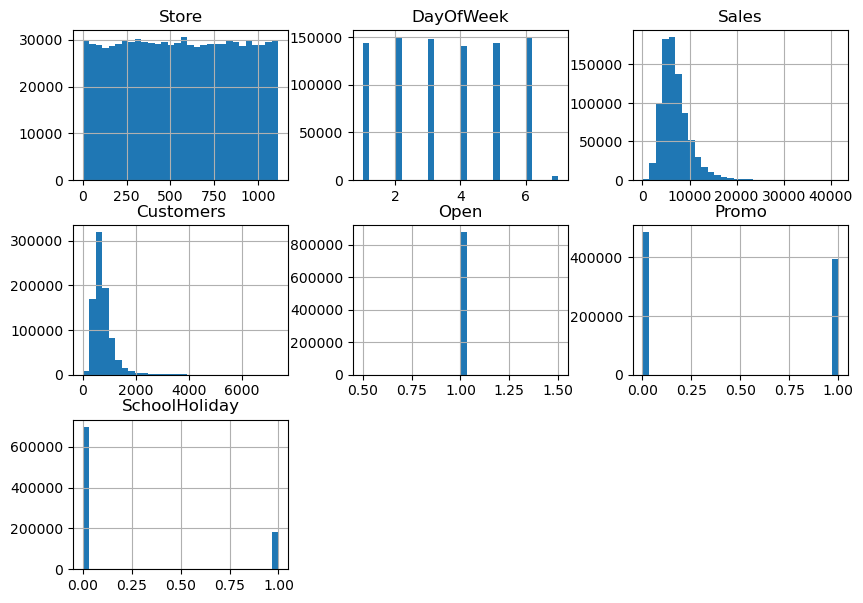

In [ ]:
data2.hist(bins=30, figsize=(10,7))
plt.show()

In [ ]:
data2.loc[(data2['Open'] != 0) & (data2['DayOfWeek'] == 7) & (data2['Sales'] !=0), :]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5659,85,7,26/07/2015,11421.0,1606.0,1.0,0,0,0
5696,122,7,26/07/2015,5773.0,707.0,1.0,0,0,0
5783,209,7,26/07/2015,3742.0,354.0,1.0,0,0,0
5833,259,7,26/07/2015,15998.0,2857.0,1.0,0,0,0
5836,262,7,26/07/2015,32547.0,4783.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...
40096,931,7,02/08/2015,NaN,NaN,1.0,0,0,0
40111,948,7,02/08/2015,NaN,NaN,1.0,0,0,0
40175,1045,7,02/08/2015,NaN,NaN,1.0,0,0,0
40216,1097,7,02/08/2015,NaN,NaN,1.0,0,0,0


<AxesSubplot: xlabel='StateHoliday', ylabel='Sales'>

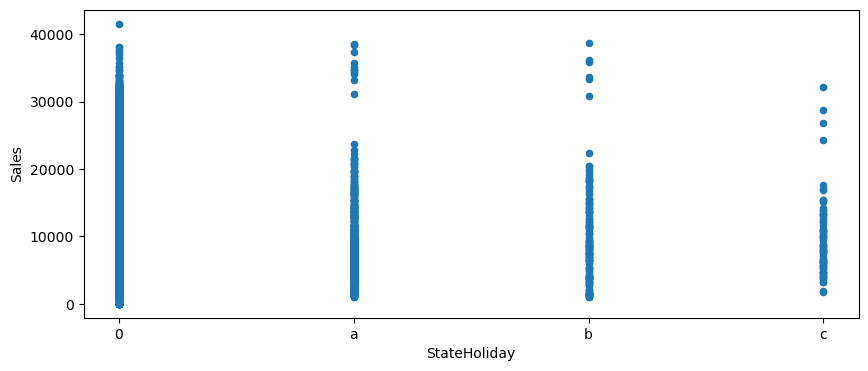

In [ ]:
data2.plot(kind='scatter',x='StateHoliday',y='Sales',figsize=(10,4))

<AxesSubplot: xlabel='DayOfWeek', ylabel='Sales'>

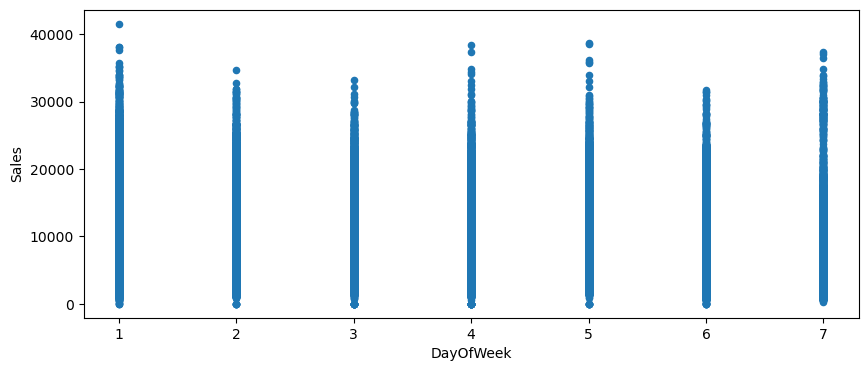

In [ ]:
data2.plot(kind='scatter',x='DayOfWeek',y='Sales',figsize=(10,4))

In [ ]:
data2['Date']=pd.to_datetime(data2['Date'],infer_datetime_format=True, format='%Y-%m-%d')

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_1054/3367230732.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data2['Date']=pd.to_datetime(data2['Date'],infer_datetime_format=True, format='%Y-%m-%d')
/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_1054/3367230732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Date']=pd.to_datetime(data2['Date'],infer_datetime_format=True, format='%Y-%m-%d')


In [ ]:
import plotly.express as px
df = px.data.tips()

In [ ]:
#fig = px.ecdf(df, x=data2["Date"], y=data2["Sales"], color=data2["Promo"], ecdfnorm=None, marginal="histogram")
#fig.show()

In [ ]:
#fig = px.ecdf(df, x=data2["Date"], y=data2["Sales"], color=data2["SchoolHoliday"], ecdfnorm=None, marginal="histogram")
#fig.show()

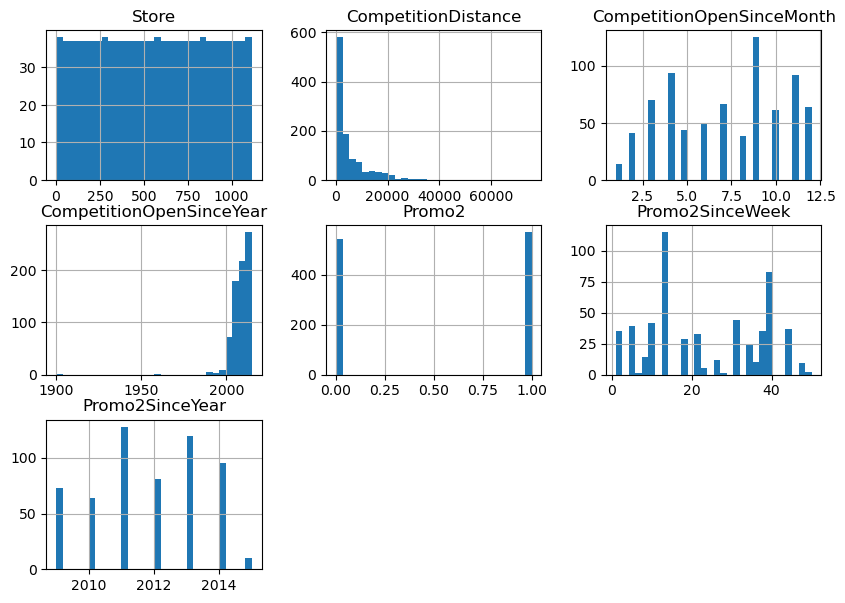

In [ ]:
#There are missing values in CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Provo2SinceYear, PromoInterval
#Promo Interval including the month information -> this to be re-formed for the further analysis. 
store.hist(bins=30, figsize=(10,7))
plt.show()

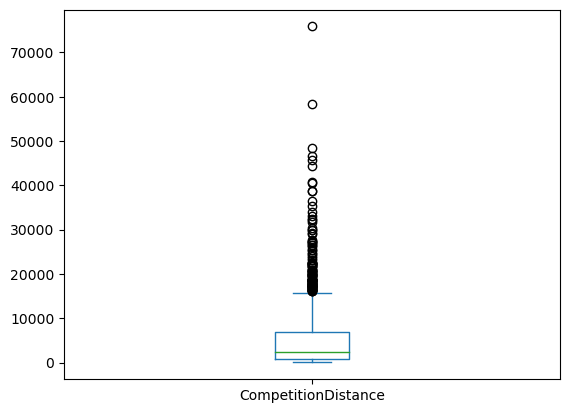

In [ ]:
store['CompetitionDistance'].plot(kind='box');

In [ ]:
store2=copy.deepcopy(store)

In [ ]:
store2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store2[store2['CompetitionDistance']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
store2[store2['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
median = np.median(store2['CompetitionDistance'].dropna())
store2['CompetitionDistance'].fillna(median, inplace=True)

In [ ]:
store2[store2['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
store2[store2['CompetitionDistance']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
store2['CompetitionDistance']=store2['CompetitionDistance'].astype(int)
store2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   int64  
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 87.2+ KB


In [ ]:
store2[(store2.CompetitionDistance>=20400)].count()

Store                        53
StoreType                    53
Assortment                   53
CompetitionDistance          53
CompetitionOpenSinceMonth    40
CompetitionOpenSinceYear     40
Promo2                       53
Promo2SinceWeek               9
Promo2SinceYear               9
PromoInterval                 9
dtype: int64

In [ ]:
store2[(store2.CompetitionOpenSinceMonth.isna())].count()

Store                        354
StoreType                    354
Assortment                   354
CompetitionDistance          354
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                       354
Promo2SinceWeek              206
Promo2SinceYear              206
PromoInterval                206
dtype: int64

In [ ]:
store2[(store2.CompetitionDistance==0)&(store2.CompetitionOpenSinceMonth.isna())]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
store2[(store2.CompetitionDistance>=20400)&(store2.CompetitionOpenSinceMonth.isna())].count()

Store                        13
StoreType                    13
Assortment                   13
CompetitionDistance          13
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                       13
Promo2SinceWeek               4
Promo2SinceYear               4
PromoInterval                 4
dtype: int64

In [ ]:
store2[(store2.CompetitionDistance<20400)&(store2.CompetitionOpenSinceMonth.isna())].count()

Store                        341
StoreType                    341
Assortment                   341
CompetitionDistance          341
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                       341
Promo2SinceWeek              202
Promo2SinceYear              202
PromoInterval                202
dtype: int64

In [ ]:
#Data merge 
merged_data_cd=pd.merge(data2, store2, how = 'left', on="Store")

<AxesSubplot: xlabel='Sales', ylabel='CompetitionDistance'>

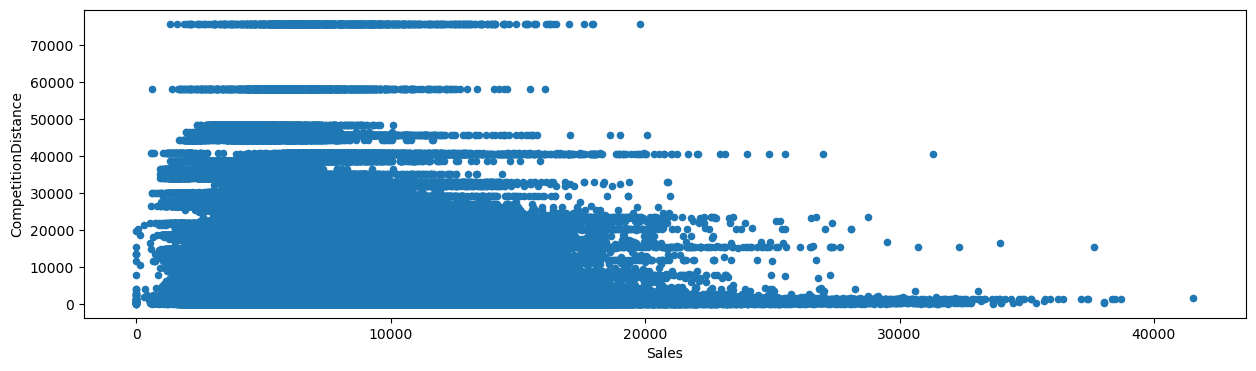

In [ ]:
merged_data_cd.plot(kind='scatter',x='Sales',y='CompetitionDistance',figsize=(15,4) )

In [ ]:
merged_data_cd['CompetitionDistance'].isna().sum()

0

In [ ]:
cd75= np.percentile(merged_data_cd['CompetitionDistance'], 75)
cd75

6880.0

In [ ]:
cd95= np.percentile(merged_data_cd['CompetitionDistance'], 95)
cd95

20390.0

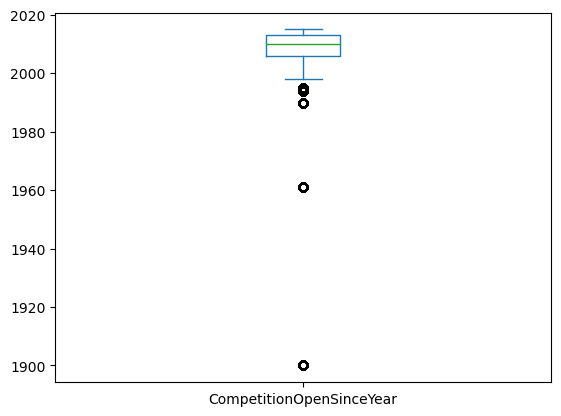

In [ ]:
#CompitionOpendate missing value and outliers 
merged_data_cd['CompetitionOpenSinceYear'].plot(kind='box');

In [ ]:
from scipy.stats import mode

# Calculate mode
mode_value = mode(merged_data_cd['CompetitionOpenSinceYear'])[0][0]

# Replace missing values with mode
merged_data_cd['CompetitionOpenSinceYear'] = merged_data_cd['CompetitionOpenSinceYear'].fillna(mode_value)


In [ ]:
# Calculate median
median_value = merged_data_cd['CompetitionOpenSinceMonth'].median()

# Replace missing values with mode
merged_data_cd['CompetitionOpenSinceMonth'] = merged_data_cd['CompetitionOpenSinceMonth'].fillna(median_value)


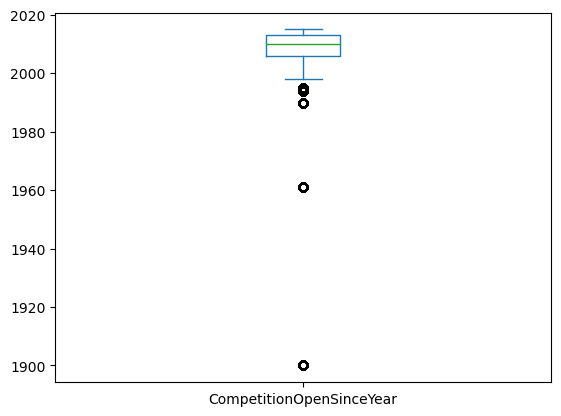

In [ ]:
merged_data_cd['CompetitionOpenSinceYear'].plot(kind='box');

In [ ]:
merged_data_cd[(merged_data_cd.CompetitionOpenSinceYear<1972)].count()

Store                        1482
DayOfWeek                    1482
Date                         1482
Sales                        1401
Customers                    1401
Open                         1482
Promo                        1482
StateHoliday                 1482
SchoolHoliday                1482
StoreType                    1482
Assortment                   1482
CompetitionDistance          1482
CompetitionOpenSinceMonth    1482
CompetitionOpenSinceYear     1482
Promo2                       1482
Promo2SinceWeek              1482
Promo2SinceYear              1482
PromoInterval                1482
dtype: int64

<AxesSubplot: xlabel='CompetitionOpenSinceYear', ylabel='Sales'>

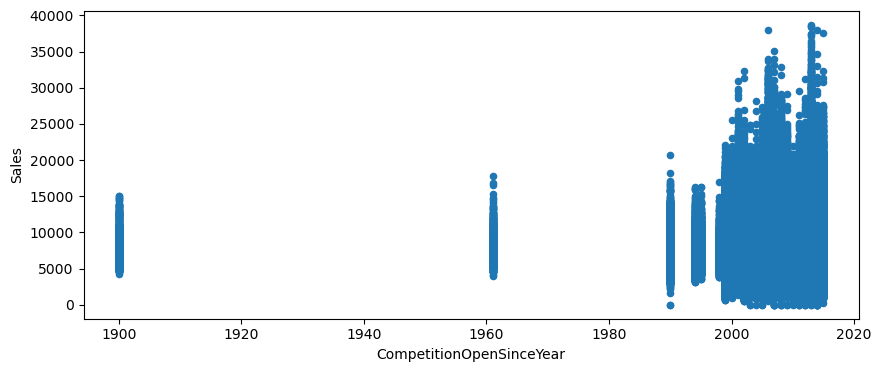

In [ ]:
merged_data_cd.plot(kind='scatter',x='CompetitionOpenSinceYear',y='Sales',figsize=(10,4))

In [ ]:
mode_value = merged_data_cd['CompetitionOpenSinceYear'].mode().values[0]
merged_data_cd['CompetitionOpenSinceYear'] = merged_data_cd['CompetitionOpenSinceYear'].where(merged_data_cd.CompetitionOpenSinceYear >= 1972, mode_value)

<AxesSubplot: xlabel='CompetitionOpenSinceYear', ylabel='Sales'>

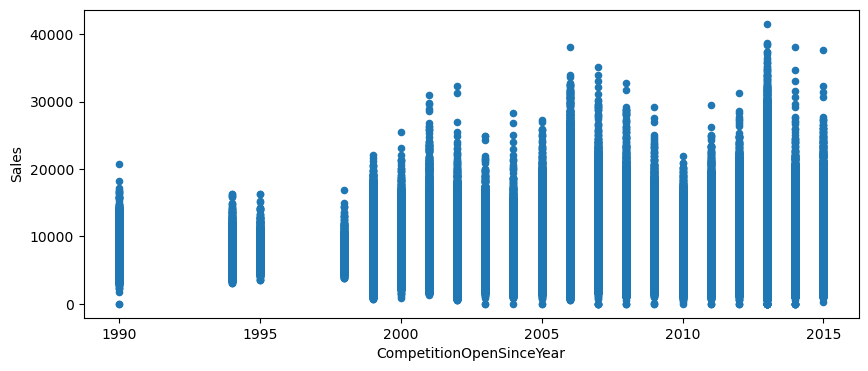

In [ ]:
merged_data_cd.plot(kind='scatter',x='CompetitionOpenSinceYear',y='Sales',figsize=(10,4))

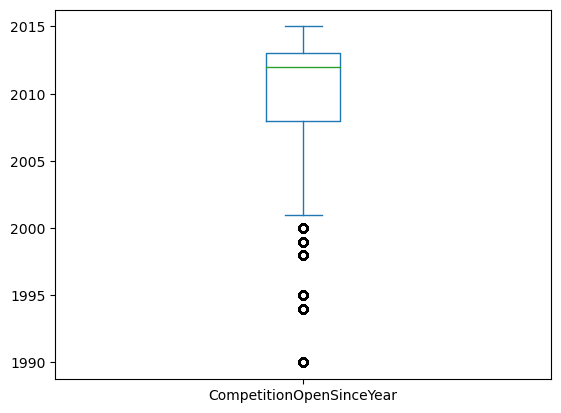

In [ ]:
merged_data_cd['CompetitionOpenSinceYear'].plot(kind='box');

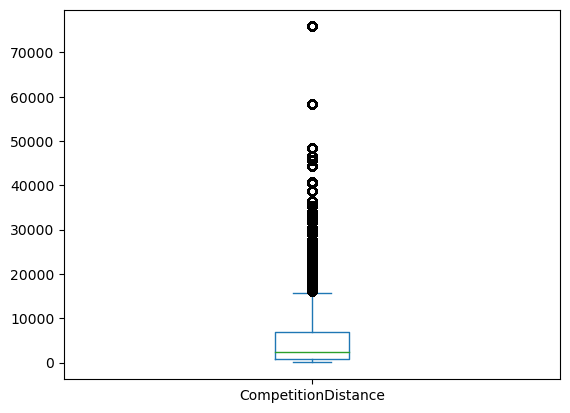

In [ ]:
merged_data_cd['CompetitionDistance'].plot(kind='box');

In [ ]:
cd95= np.percentile(merged_data_cd['CompetitionDistance'], 95)
cd95

20390.0

In [ ]:
merged_data_cd[(merged_data_cd.CompetitionDistance>20400)].count()

Store                        42883
DayOfWeek                    42883
Date                         42883
Sales                        41472
Customers                    41472
Open                         42883
Promo                        42883
StateHoliday                 42883
SchoolHoliday                42883
StoreType                    42883
Assortment                   42883
CompetitionDistance          42883
CompetitionOpenSinceMonth    42883
CompetitionOpenSinceYear     42883
Promo2                       42883
Promo2SinceWeek               6996
Promo2SinceYear               6996
PromoInterval                 6996
dtype: int64

In [ ]:
median_value = np.median(merged_data_cd['CompetitionDistance'])
merged_data_cd['CompetitionDistance'] = merged_data_cd['CompetitionDistance'].where(merged_data_cd.CompetitionDistance <= 20400, median_value)

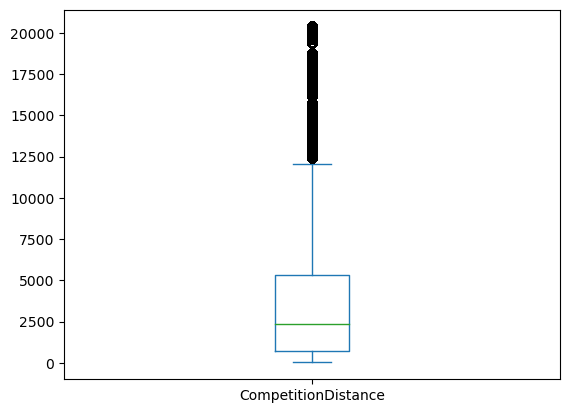

In [ ]:
merged_data_cd['CompetitionDistance'].plot(kind='box');

<AxesSubplot: xlabel='Sales', ylabel='CompetitionDistance'>

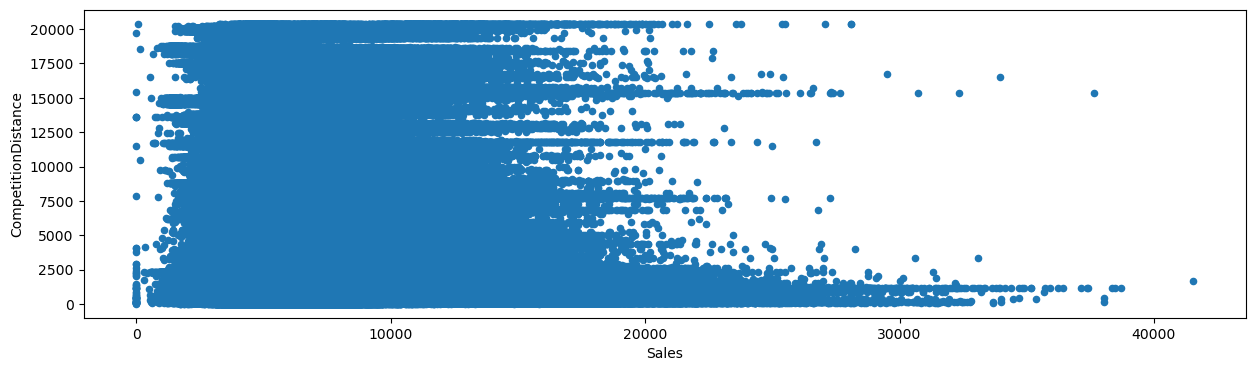

In [ ]:
merged_data_cd.plot(kind='scatter',x='Sales',y='CompetitionDistance',figsize=(15,4) )

In [ ]:
merged_data_cd

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,c,a,1270,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,a,a,570,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,a,a,14130,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,c,c,620,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,a,a,2325,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879491,1111,6,2015-01-08,NaN,NaN,1.0,0,0,0,a,a,1900,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
879492,1112,6,2015-01-08,NaN,NaN,1.0,0,0,0,c,c,1880,4.0,2006.0,0,NaN,NaN,NaN
879493,1113,6,2015-01-08,NaN,NaN,1.0,0,0,0,a,c,9260,8.0,2013.0,0,NaN,NaN,NaN
879494,1114,6,2015-01-08,NaN,NaN,1.0,0,0,0,a,c,870,8.0,2013.0,0,NaN,NaN,NaN


In [ ]:
#With the same manner, replace Promo 2 date 

# Calculate median
mode_value = merged_data_cd['Promo2SinceYear'].median()

# Replace missing values with mode
if merged_data_cd['Promo2'].iloc[0] == 1:
    merged_data_cd['Promo2SinceYear'] = merged_data_cd['Promo2SinceYear'].fillna(mode_value)
else: 
    merged_data_cd['Promo2SinceYear'] = merged_data_cd['Promo2SinceYear'].fillna(1900)


# Calculate median
median_value = merged_data_cd['Promo2SinceWeek'].median()

# Replace missing values with mode
if merged_data_cd['Promo2'].iloc[0] == 1:
    merged_data_cd['Promo2SinceWeek'] = merged_data_cd['Promo2SinceWeek'].fillna(median_value)
else: 
    merged_data_cd['Promo2SinceWeek'] = merged_data_cd['Promo2SinceWeek'].fillna(1)

In [ ]:
merged_data_cd[merged_data_cd['Promo2SinceYear']==1900]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,c,a,1270,9.0,2008.0,0,1.0,1900.0,NaN
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,c,c,620,9.0,2009.0,0,1.0,1900.0,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,a,a,2325,4.0,2015.0,0,1.0,1900.0,NaN
5,6,5,2015-07-31,5651.0,589.0,1.0,1,0,1,a,a,310,12.0,2013.0,0,1.0,1900.0,NaN
6,7,5,2015-07-31,15344.0,1414.0,1.0,1,0,1,a,c,2325,4.0,2013.0,0,1.0,1900.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879480,1097,6,2015-01-08,NaN,NaN,1.0,0,0,0,b,b,720,3.0,2002.0,0,1.0,1900.0,NaN
879483,1101,6,2015-01-08,NaN,NaN,1.0,0,0,0,d,c,4060,9.0,2012.0,0,1.0,1900.0,NaN
879492,1112,6,2015-01-08,NaN,NaN,1.0,0,0,0,c,c,1880,4.0,2006.0,0,1.0,1900.0,NaN
879493,1113,6,2015-01-08,NaN,NaN,1.0,0,0,0,a,c,9260,8.0,2013.0,0,1.0,1900.0,NaN


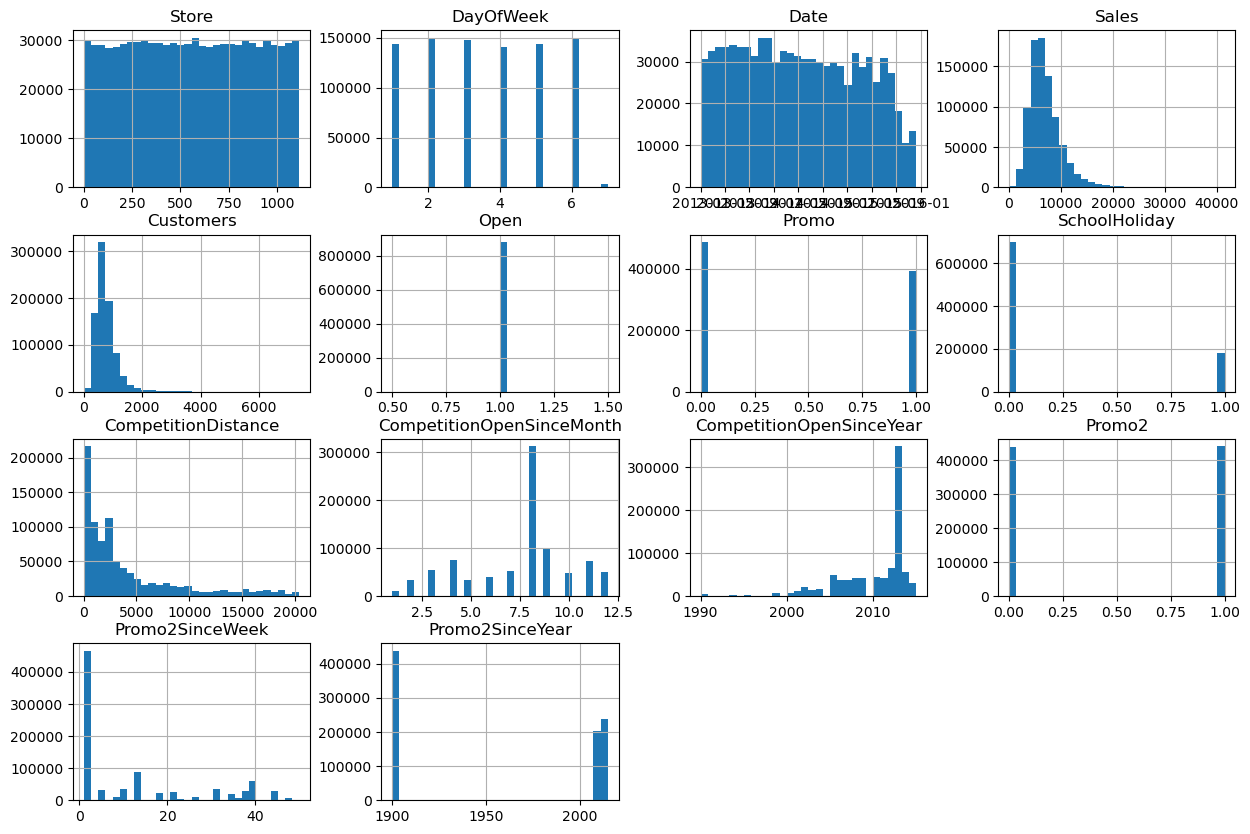

In [ ]:
merged_data_cd.hist(bins=30, figsize=(15,10))
plt.show()

In [ ]:
#Add column of competitionopendate
merged_data_cd['CompetitionOpenSinceYear']=merged_data_cd['CompetitionOpenSinceYear'].astype(int)
merged_data_cd['CompetitionOpenSinceMonth']=merged_data_cd['CompetitionOpenSinceMonth'].astype(int)

merged_data_cd['CompetitionOpenDate']=merged_data_cd['CompetitionOpenSinceYear'].astype(str).str.zfill(4)+merged_data_cd['CompetitionOpenSinceMonth'].astype(str).str.zfill(2)+'01'
merged_data_cd['CompetitionOpenDate'] = pd.to_datetime(merged_data_cd['CompetitionOpenDate'], format='%Y%m%d')

In [ ]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)
    
comp_months(merged_data_cd)

In [ ]:
#Add column of Promo2SinceDate
merged_data_cd['Promo2SinceYear']=merged_data_cd['Promo2SinceYear'].astype(int)
merged_data_cd['Promo2SinceWeek']=merged_data_cd['Promo2SinceWeek'].astype(int)

merged_data_cd['Promo2Date']=merged_data_cd['Promo2SinceYear'].astype(str).str.zfill(4)+merged_data_cd['Promo2SinceWeek'].astype(str).str.zfill(2)

import datetime
def to_datetime(x):
  return datetime.datetime.strptime(x + '-1', "%Y%W-%w")

merged_data_cd['Promo2Date'] = merged_data_cd['Promo2Date'].apply(to_datetime)

In [ ]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']
    
promo_cols(merged_data_cd)

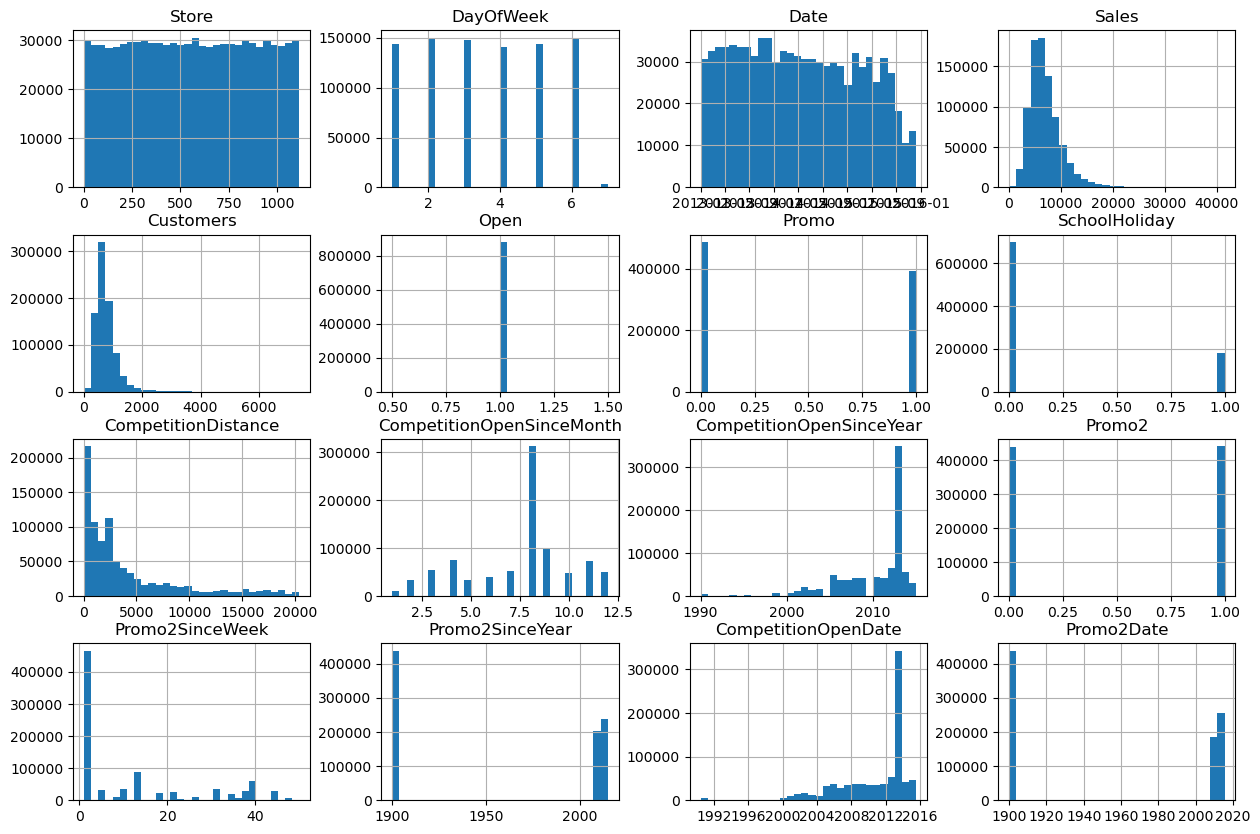

In [ ]:
merged_data_cd.hist(bins=30, figsize=(15,10))
plt.show()

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_1054/317634207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_data_cd.CompetitionDistance, kde=True)


<AxesSubplot: xlabel='CompetitionDistance', ylabel='Density'>

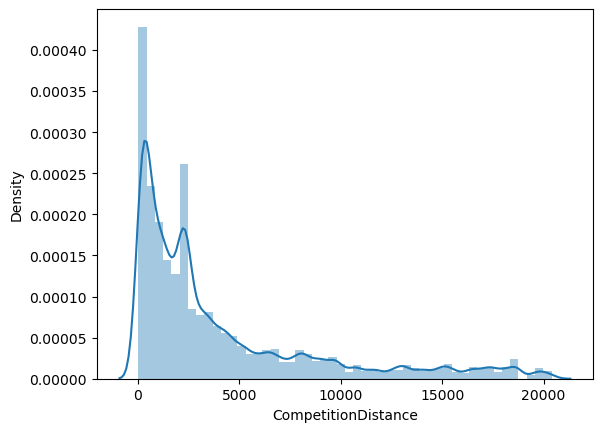

In [ ]:
sns.distplot(merged_data_cd.CompetitionDistance, kde=True)

In [ ]:
#change date to yes or no (Competition and promo2 was on or not on the day) - dummy variablble
merged_data_cd['Date']=pd.to_datetime(merged_data_cd['Date'],infer_datetime_format=True, format='%Y-%m-%d')

#Add additional columns of Competition and Promo2
merged_data_cd['CompetitionYN']=np.where(merged_data_cd['CompetitionOpenDate']>=merged_data_cd['Date'], 0, 1)
merged_data_cd['Promo2YN']=np.where(merged_data_cd['Promo2Date']>=merged_data_cd['Date'], 0, 1)

In [ ]:
merged_data_cd['Promo2YN']=np.where(merged_data_cd['Promo2Date']=='1900-01-01', 0, 1)

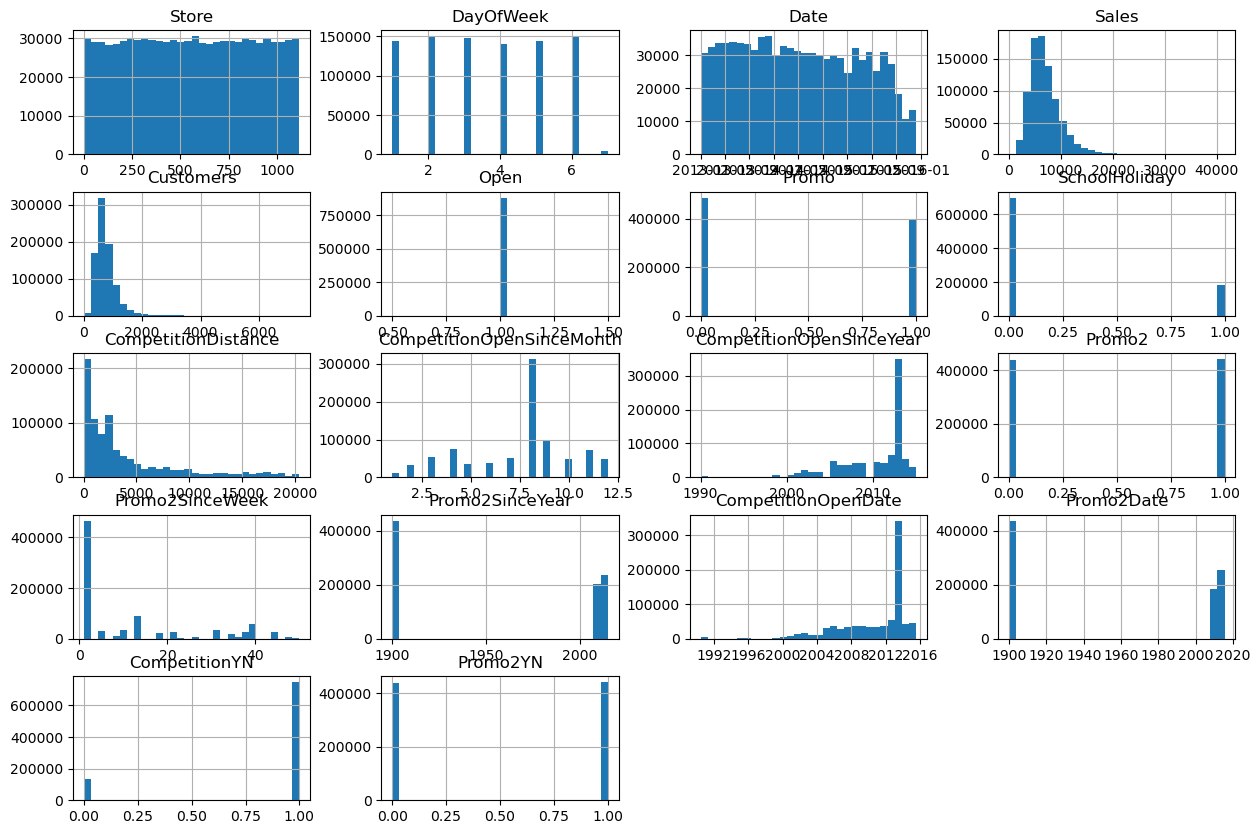

In [ ]:
merged_data_cd.hist(bins=30, figsize=(15,10))
plt.show()

In [ ]:
merged_data_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879496 entries, 0 to 879495
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      879496 non-null  int64         
 1   DayOfWeek                  879496 non-null  int64         
 2   Date                       879496 non-null  datetime64[ns]
 3   Sales                      844392 non-null  float64       
 4   Customers                  844392 non-null  float64       
 5   Open                       879485 non-null  float64       
 6   Promo                      879496 non-null  int64         
 7   StateHoliday               879496 non-null  object        
 8   SchoolHoliday              879496 non-null  int64         
 9   StoreType                  879496 non-null  object        
 10  Assortment                 879496 non-null  object        
 11  CompetitionDistance        879496 non-null  int64   

In [ ]:
merged_data=copy.deepcopy(merged_data_cd)

In [ ]:
list_of_categorical_columns=['PromoInterval','StoreType', 'Assortment', 'StateHoliday']
merged_data = pd.get_dummies(merged_data, columns=list_of_categorical_columns, drop_first=True)

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_1054/2412573930.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = np.zeros_like(merged_data.corr(numeric_only=False), dtype = np.bool)


<AxesSubplot: >

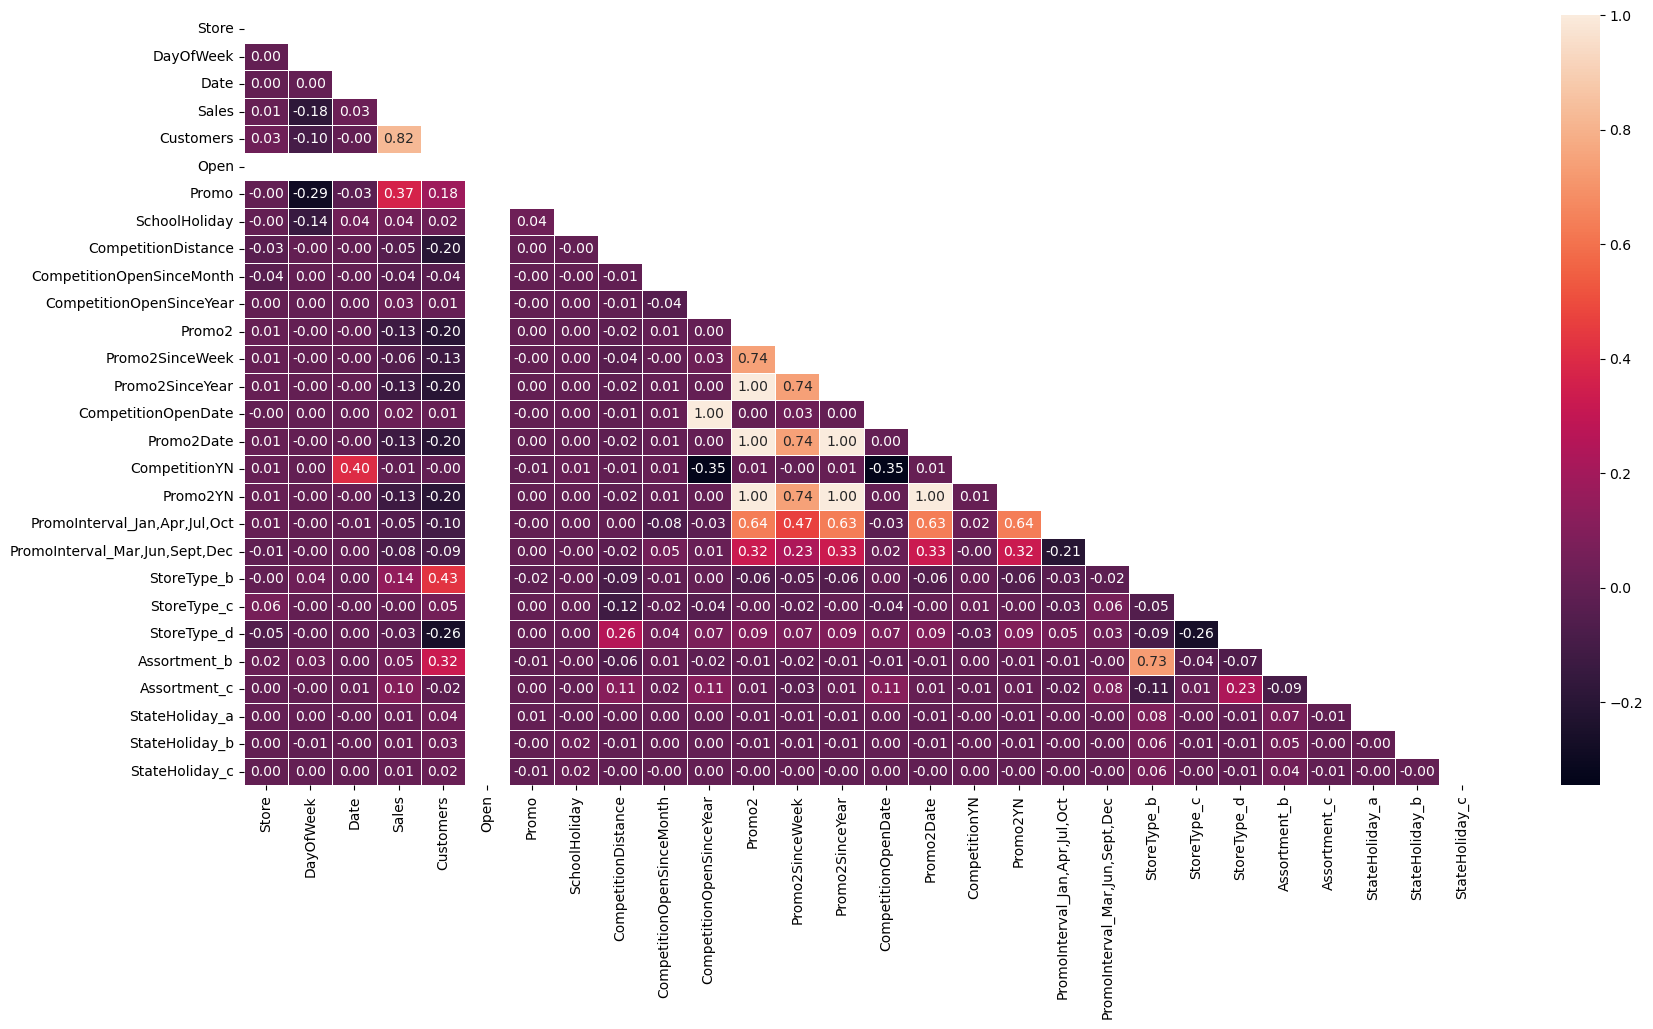

In [ ]:
upper_triangle = np.zeros_like(merged_data.corr(numeric_only=False), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged_data.corr(numeric_only=False),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5)

<AxesSubplot: xlabel='Date'>

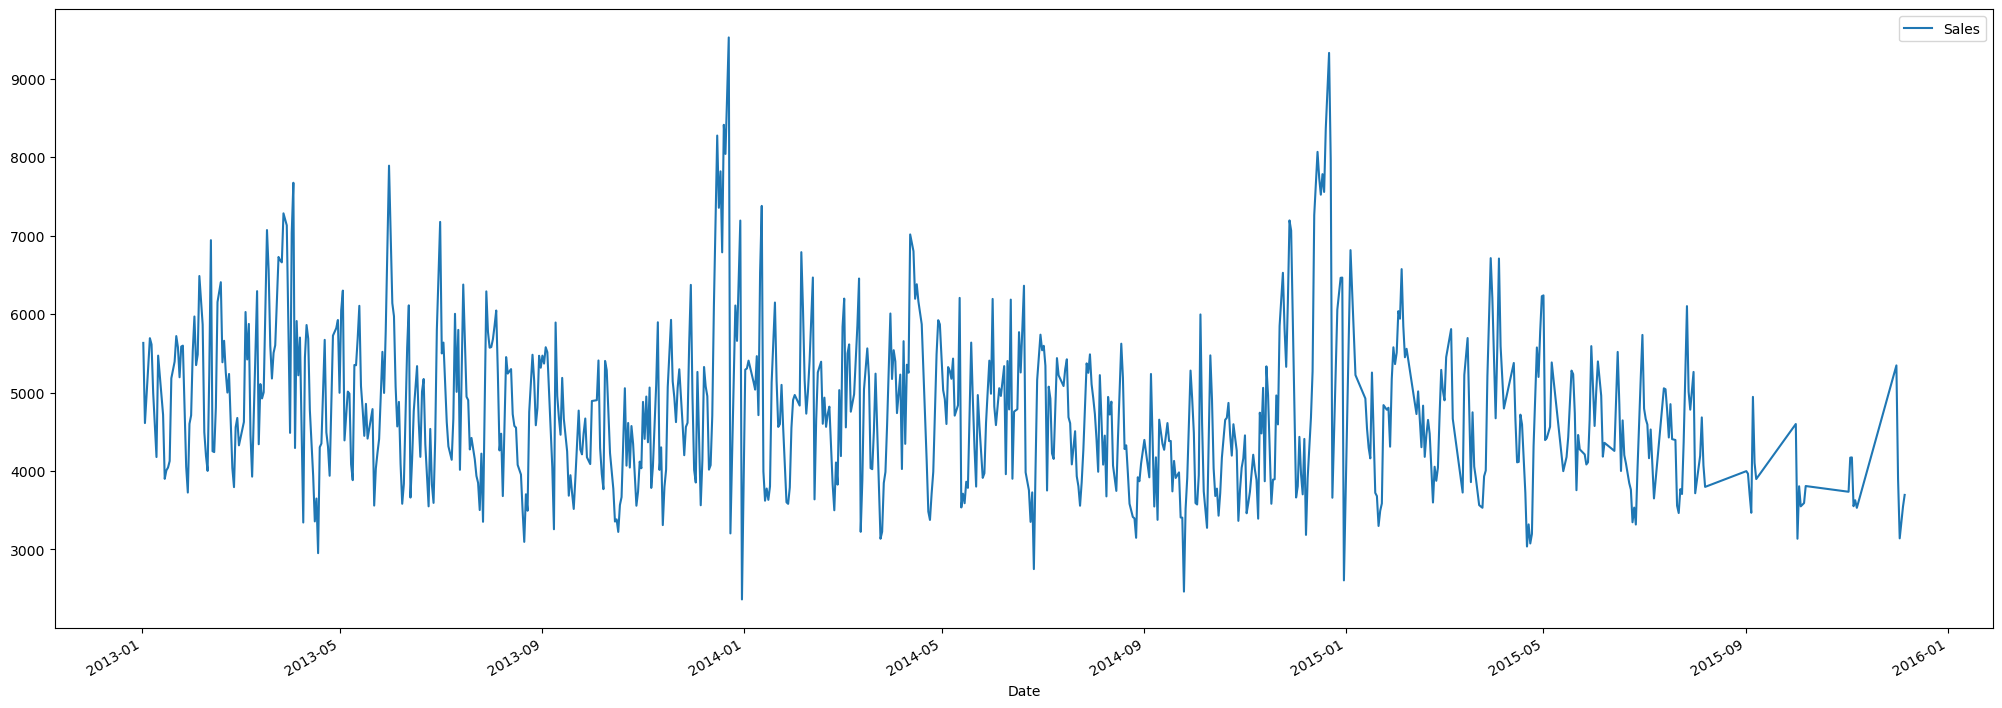

In [ ]:
f = plt.figure(figsize=(25,20))
ax1 = f.add_subplot(211)

store_1 = merged_data.loc[(merged_data["Store"]==1)&(merged_data['Sales']>0), ['Date',"Sales"]]
store_1.plot(kind='line',x='Date', y='Sales', ax=ax1)

In [ ]:
merged_data2=copy.deepcopy(merged_data)

In [ ]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879496 entries, 0 to 879495
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           879496 non-null  int64         
 1   DayOfWeek                       879496 non-null  int64         
 2   Date                            879496 non-null  datetime64[ns]
 3   Sales                           844392 non-null  float64       
 4   Customers                       844392 non-null  float64       
 5   Open                            879485 non-null  float64       
 6   Promo                           879496 non-null  int64         
 7   SchoolHoliday                   879496 non-null  int64         
 8   CompetitionDistance             879496 non-null  int64         
 9   CompetitionOpenSinceMonth       879496 non-null  int64         
 10  CompetitionOpenSinceYear        879496 non-null  int64  

In [ ]:
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(merged_data2.shape[0]),str(merged_data2.shape[1]))) 

The Train_Store dataset has 879496 Rows and 28 Variables


In [ ]:
# Add Additional Categorical variable of CompetitionDistance 
merged_data2['CompetitionDist_Cat']=pd.cut(merged_data2['CompetitionDistance'], 5)
merged_data2.groupby(by="CompetitionDist_Cat").Sales.mean(),merged_data2.groupby(by="CompetitionDist_Cat").Customers.mean()

# Calculate the mean of Sales for each category of CompetitionDist_Cat
mean_sales = merged_data2.groupby(by="CompetitionDist_Cat").Sales.mean().to_dict()

# Create a new column 'CompetitionDist_Num' and map the mean Sales values to each category
merged_data2['CompetitionDist_Num'] = merged_data2['CompetitionDist_Cat'].map(mean_sales)

# Drop the original CompetitionDistance and CompetitionDist_Cat columns
merged_data2.drop(['CompetitionDistance', 'CompetitionDist_Cat'], axis=1, inplace=True)

In [ ]:
merged_data2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionOpenDate', 'Promo2Date', 'CompetitionYN',
       'Promo2YN', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'CompetitionDist_Num'],
      dtype='object')

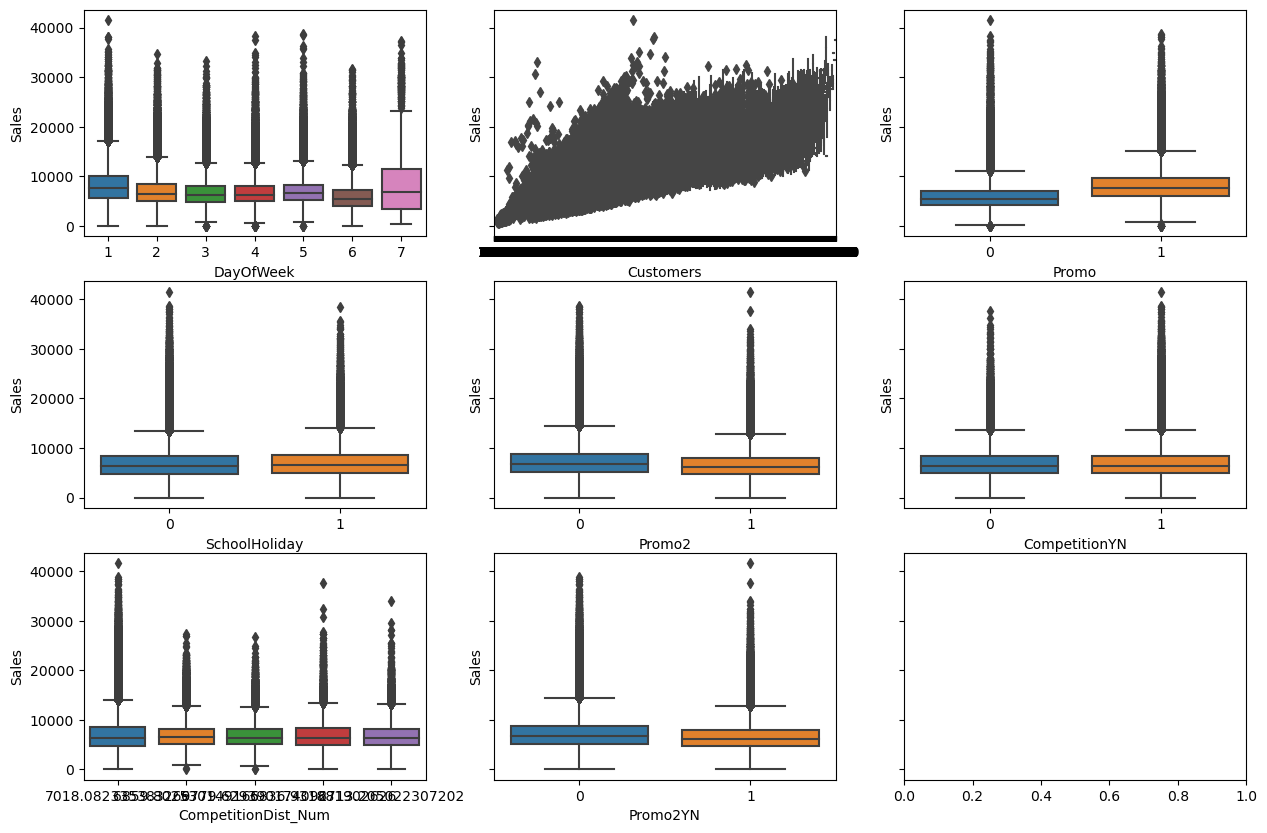

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=False, sharey=True)
i = [0,0,0,1,1,1,2,2,2]
j=[0,1,2,0,1,2,0,1,2]
column=['DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'Promo2', 'CompetitionYN', 'CompetitionDist_Num',
       'Promo2YN']

for c, i, j in zip(column, i, j):
    ax=sns.boxplot(x=merged_data2[c],y=merged_data2.Sales,ax = axes[i, j])

plt.show()

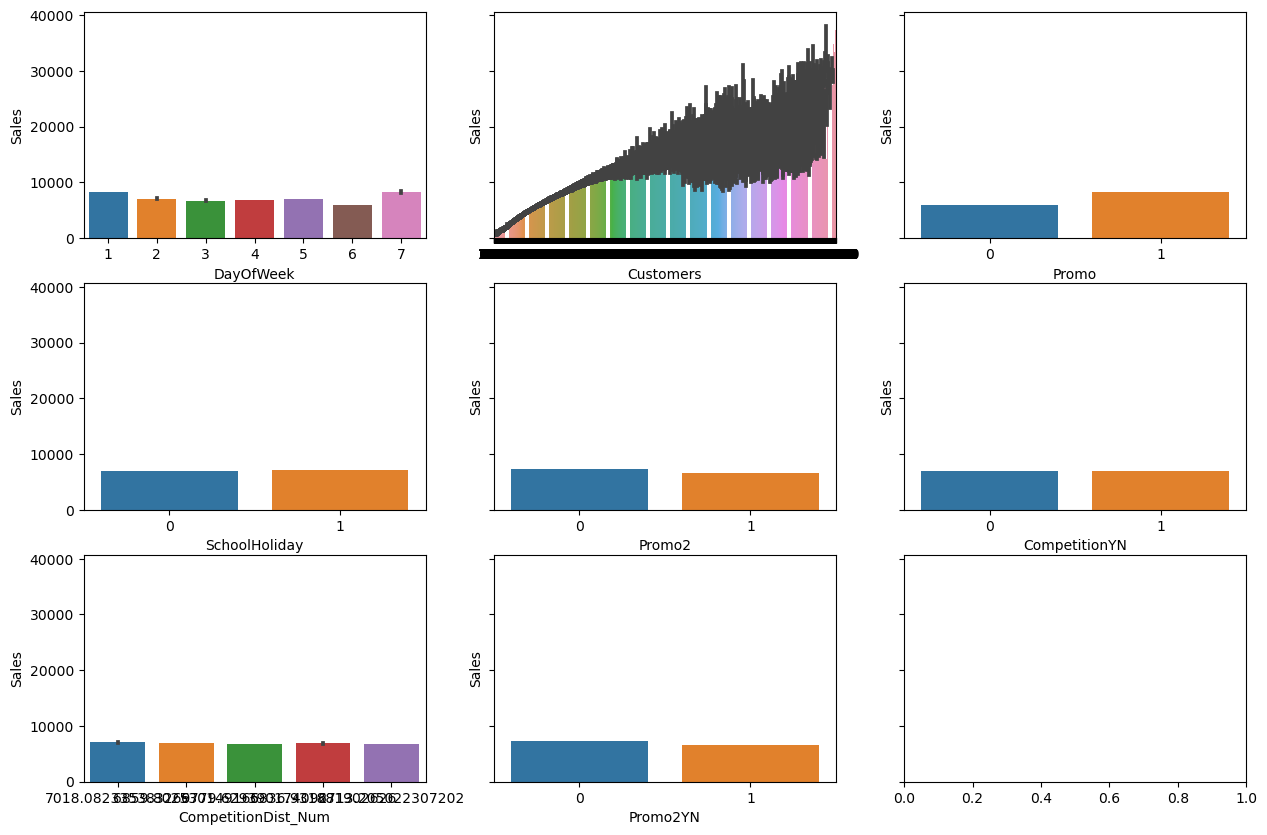

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=False, sharey=True)
i = [0,0,0,1,1,1,2,2,2]
j=[0,1,2,0,1,2,0,1,2]
column=['DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday', 'Promo2', 'CompetitionYN', 'CompetitionDist_Num',
       'Promo2YN']

for c, i, j in zip(column, i, j):
    ax=sns.barplot(x=merged_data2[c],y=merged_data2.Sales,ax = axes[i, j])

plt.show()

In [ ]:
merged_data2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,"PromoInterval_Mar,Jun,Sept,Dec",StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDist_Num
0,1,5,2015-07-31,5263.0,555.0,1.0,1,1,9,2008,...,0,0,1,0,0,0,0,0,0,7018.082335
1,2,5,2015-07-31,6064.0,625.0,1.0,1,1,11,2007,...,0,0,0,0,0,0,0,0,0,7018.082335
2,3,5,2015-07-31,8314.0,821.0,1.0,1,1,12,2006,...,0,0,0,0,0,0,0,0,0,6836.931882
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,1,9,2009,...,0,0,1,0,0,1,0,0,0,7018.082335
4,5,5,2015-07-31,4822.0,559.0,1.0,1,1,4,2015,...,0,0,0,0,0,0,0,0,0,7018.082335


In [ ]:
merged_data2['CompetitionDist_Num']=merged_data2['CompetitionDist_Num'].astype(int)

In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    
split_date(merged_data2)

In [ ]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879496 entries, 0 to 879495
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           879496 non-null  int64         
 1   DayOfWeek                       879496 non-null  int64         
 2   Date                            879496 non-null  datetime64[ns]
 3   Sales                           844392 non-null  float64       
 4   Customers                       844392 non-null  float64       
 5   Open                            879485 non-null  float64       
 6   Promo                           879496 non-null  int64         
 7   SchoolHoliday                   879496 non-null  int64         
 8   CompetitionOpenSinceMonth       879496 non-null  int64         
 9   CompetitionOpenSinceYear        879496 non-null  int64         
 10  Promo2                          879496 non-null  int64  

In [ ]:
merged_data2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionOpenDate', 'Promo2Date', 'CompetitionYN',
       'Promo2YN', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear'],
      dtype='object')

In [ ]:
numerical_subset = ['Customers', 'CompetitionDist_Num',]
categorical_subset_num = ['Promo',
       'SchoolHoliday',  'Promo2',  'CompetitionYN',
       'Promo2YN',  'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c','Store', 'DayOfWeek', 'Year',
       'Month', 'Day', 'WeekOfYear']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(merged_data2[numerical_subset])
merged_data2[numerical_subset] = scaler.transform(merged_data2[numerical_subset])

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(merged_data2['WeekOfYear'])
merged_data2['WeekOfYear'] = encoder.transform(merged_data2['WeekOfYear'])


#Keep below
 [['Store', 'DayOfWeek', 'Date', 'Customers', 'Promo',
       'SchoolHoliday',  'Promo2',  'CompetitionYN',
      'Promo2YN',  'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear']]

#Discard below 
'CompetitionOpenSinceMonth',
'CompetitionOpenSinceYear',
'Promo2SinceWeek',
'Promo2SinceYear', 
'CompetitionOpenDate', 'Promo2Date',
'PromoInterval_Jan,Apr,Jul,Oct',
'PromoInterval_Mar,Jun,Sept,Dec',
'Open', 

In [ ]:
# Train and Test data set split
traindata=merged_data2[merged_data2['Sales'].notna()]
testdata=merged_data2[merged_data2['Sales'].isna()]

In [ ]:
traindata=traindata[['Store', 'Date','DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday',  'Promo2',  'CompetitionYN',
       'Promo2YN',  'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear', 'Sales']]

testdata=testdata[['Store', 'Date','DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday',  'Promo2',  'CompetitionYN',
       'Promo2YN',  'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear', 'Sales']]

In [ ]:
# Check total data number is the same
len_T=len(traindata)+len(testdata)
len_d=len(merged_data2)
len_T==len_d

True

In [ ]:
X_train=traindata[['Store', 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday',  'Promo2',  'CompetitionYN',
       'Promo2YN',  'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear']]
y_train=traindata[['Sales']]



X_test=testdata[['Store', 'DayOfWeek', 'Customers', 'Promo',
       'SchoolHoliday',  'Promo2',  'CompetitionYN',
       'Promo2YN',  'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear']]
y_test=testdata[['Sales']]

In [ ]:
# To divide the first 6 weeks and the rest sales data for test and training 
traindata = traindata.sort_values('Date')

In [ ]:
traindata

,Store,Date,DayOfWeek,Customers,Promo,SchoolHoliday,Promo2,CompetitionYN,Promo2YN,StoreType_b,...,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDist_Num,Year,Month,Day,WeekOfYear,Sales
844391,1097,2013-01-01,2,0.190173,0,1,0,1,0,1,...,0,1,0,0,1.0,2013,1,1,0,5961.0
844390,948,2013-01-01,2,0.140633,0,1,0,0,0,1,...,0,1,0,0,1.0,2013,1,1,0,4491.0
844376,259,2013-01-01,2,0.195452,0,1,0,0,0,1,...,0,1,0,0,1.0,2013,1,1,0,6851.0
844377,262,2013-01-01,2,0.389145,0,1,0,0,0,1,...,0,1,0,0,1.0,2013,1,1,0,17267.0
844378,274,2013-01-01,2,0.098674,0,1,1,0,1,1,...,0,1,0,0,1.0,2013,1,1,0,3102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19012,1081,2015-12-07,7,0.116134,0,0,0,1,0,1,...,0,0,0,0,1.0,2015,12,7,49,5817.0
19013,1097,2015-12-07,7,0.363563,0,0,0,1,0,1,...,0,0,0,0,1.0,2015,12,7,49,13229.0
19014,1099,2015-12-07,7,0.099080,0,0,1,1,1,0,...,1,0,0,0,1.0,2015,12,7,49,5053.0
19000,562,2015-12-07,7,0.433406,0,0,0,1,0,1,...,1,0,0,0,1.0,2015,12,7,49,20263.0


In [ ]:
traindata

,Store,Date,DayOfWeek,Customers,Promo,SchoolHoliday,Promo2,CompetitionYN,Promo2YN,StoreType_b,...,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDist_Num,Year,Month,Day,WeekOfYear,Sales
844391,1097,2013-01-01,2,0.190173,0,1,0,1,0,1,...,0,1,0,0,1.0,2013,1,1,0,5961.0
844390,948,2013-01-01,2,0.140633,0,1,0,0,0,1,...,0,1,0,0,1.0,2013,1,1,0,4491.0
844376,259,2013-01-01,2,0.195452,0,1,0,0,0,1,...,0,1,0,0,1.0,2013,1,1,0,6851.0
844377,262,2013-01-01,2,0.389145,0,1,0,0,0,1,...,0,1,0,0,1.0,2013,1,1,0,17267.0
844378,274,2013-01-01,2,0.098674,0,1,1,0,1,1,...,0,1,0,0,1.0,2013,1,1,0,3102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19012,1081,2015-12-07,7,0.116134,0,0,0,1,0,1,...,0,0,0,0,1.0,2015,12,7,49,5817.0
19013,1097,2015-12-07,7,0.363563,0,0,0,1,0,1,...,0,0,0,0,1.0,2015,12,7,49,13229.0
19014,1099,2015-12-07,7,0.099080,0,0,1,1,1,0,...,1,0,0,0,1.0,2015,12,7,49,5053.0
19000,562,2015-12-07,7,0.433406,0,0,0,1,0,1,...,1,0,0,0,1.0,2015,12,7,49,20263.0


index ㅇ오ㅐ 들어가있지 빼고 다 시 

In [ ]:
traindata.columns

Index(['Store', 'Date', 'DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'Promo2', 'CompetitionYN', 'Promo2YN', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear', 'Sales'],
      dtype='object')

In [ ]:
# Sort by date and divide them 
train_test=traindata[:6*7*1115]
train_train=traindata[6*7*1115:]

train_train.reset_index(inplace=True)
train_test.reset_index(inplace=True)

X_train_t = train_train.drop(['Sales', 'Date', 'index'],axis=1 )
y_train_t = np.log1p(train_train.Sales)
X_test_t = train_test.drop(['Sales', 'Date','index'],axis=1 )
y_test_t = np.log1p(train_test.Sales)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
test_t=pd.concat([X_test_t,y_test_t], axis=1)
train_t=pd.concat([X_train_t,y_train_t], axis=1)

In [ ]:
X_test_t

,Store,DayOfWeek,Customers,Promo,SchoolHoliday,Promo2,CompetitionYN,Promo2YN,StoreType_b,StoreType_c,...,Assortment_b,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDist_Num,Year,Month,Day,WeekOfYear
0,1097,2,0.190173,0,1,0,1,0,1,0,...,1,0,1,0,0,1.000000,2013,1,1,0
1,948,2,0.140633,0,1,0,0,0,1,0,...,1,0,1,0,0,1.000000,2013,1,1,0
2,259,2,0.195452,0,1,0,0,0,1,0,...,1,0,1,0,0,1.000000,2013,1,1,0
3,262,2,0.389145,0,1,0,0,0,1,0,...,0,0,1,0,0,1.000000,2013,1,1,0
4,274,2,0.098674,0,1,1,0,1,1,0,...,1,0,1,0,0,1.000000,2013,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46825,927,5,0.106524,1,0,0,0,0,0,0,...,0,0,0,0,0,1.000000,2013,2,22,7
46826,926,5,0.085003,1,0,1,1,1,0,0,...,0,1,0,0,0,0.478689,2013,2,22,7
46827,925,5,0.129399,1,0,1,1,1,0,1,...,0,0,0,0,0,1.000000,2013,2,22,7
46828,924,5,0.062940,1,0,1,1,1,0,0,...,0,0,0,0,0,0.478689,2013,2,22,7


## Xgboost example. Linear and MLP is on the bottom

In [ ]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective='reg:squarederror',random_state=42, n_jobs= -1, n_estimators= 20, max_depth=20)
xg_reg.fit(X_train_t, y_train_t)

# Predict on the test data
y_pred_xgb = xg_reg.predict(X_test_t)

In [ ]:
xg_reg.score(X_train_t, y_train_t)

0.9853330289880254

In [ ]:
# Calculate the RMSPE
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.isfinite(np.square((y_test_t - y_pred_xgb) / (y_test_t)))))

rmspe_score = rmspe(y_test_t, y_pred_xgb)
print("RMSPE:", rmspe_score)


RMSPE: 0.9999466139924346


In [ ]:
feature_importance_df = pd.DataFrame({
    'feature': X_train_t.columns,
    'importance': xg_reg.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
feature_importance_df.head(10)

,feature,importance
11,Assortment_b,0.340888
10,StoreType_d,0.171124
2,Customers,0.144966
3,Promo,0.143532
8,StoreType_b,0.090529
16,CompetitionDist_Num,0.017263
5,Promo2,0.015121
12,Assortment_c,0.013787
0,Store,0.010013
9,StoreType_c,0.009876


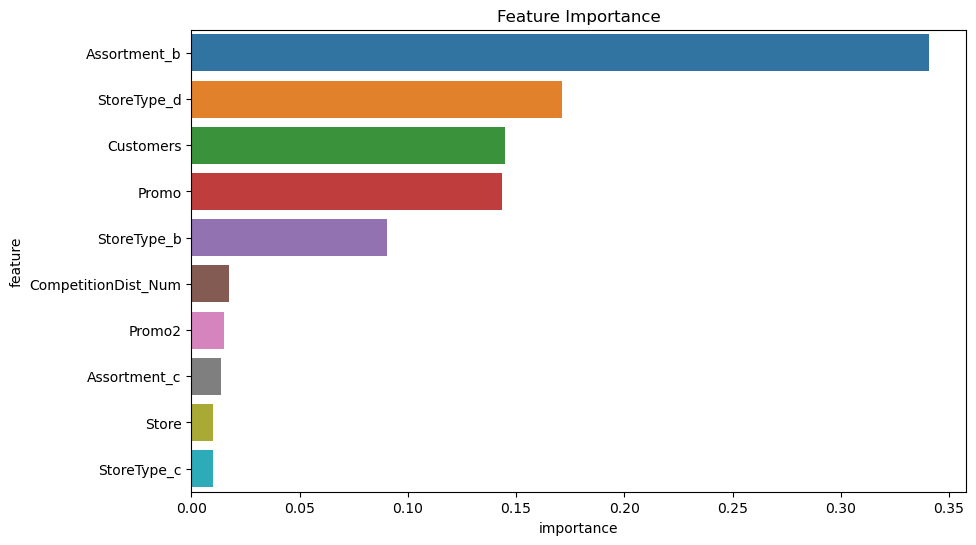

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature');

<AxesSubplot: >

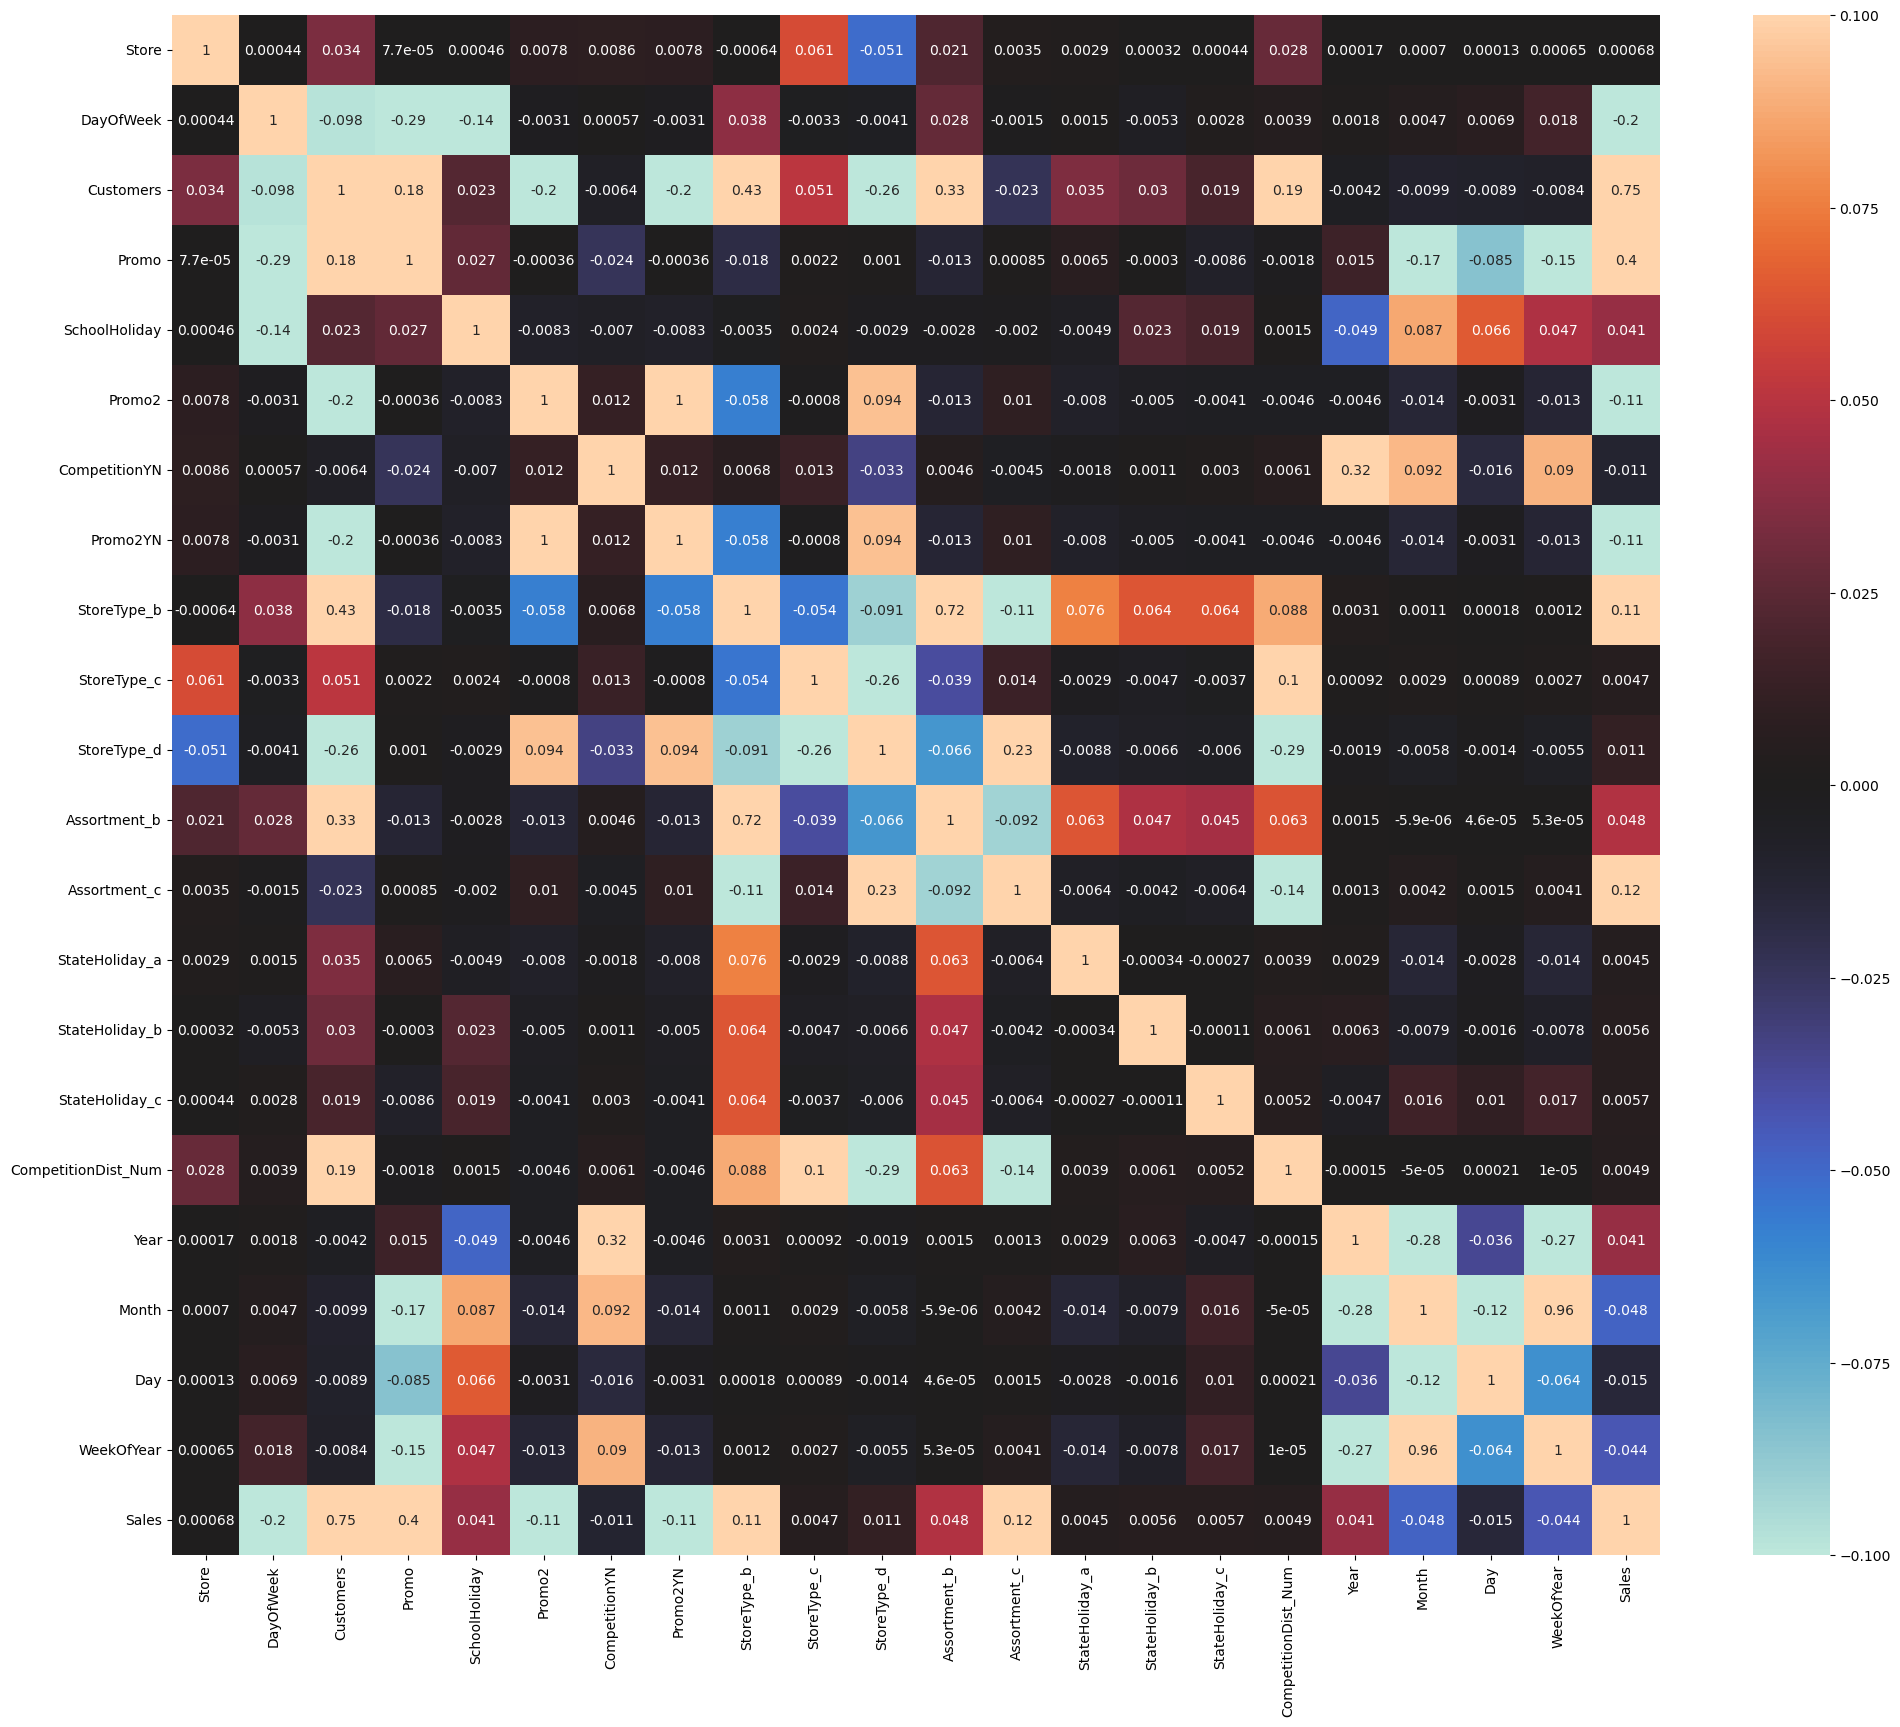

In [ ]:
plt.subplots(figsize=(24,20))
sns.heatmap(train_t.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

#### Another way of doing XGBOOST

In [ ]:
import xgboost as xgb
from time import time

params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.03,
          "max_depth": 20,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 10
          }
num_boost_round = 6000


dtrain = xgb.DMatrix(X_train_t, y_train_t)
dvalid = xgb.DMatrix(X_test_t, y_test_t)
train_valid = [(dtrain, 'train'), (dvalid, 'eval')]

In [ ]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [ ]:
print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=train_valid, early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))

print("validating")
X_test_t.sort_index(inplace=True) 
y_test_t.sort_index(inplace=True) 

yhat = gbm.predict(xgb.DMatrix(X_test_t))
error = rmspe(np.expm1(y_test_t), np.expm1(yhat))

print('RMSPE: {:.6f}'.format(error))

Train a XGBoost model
[19:40:20] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:20] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.



/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	train-rmse:8.02350	train-rmspe:0.99978	eval-rmse:7.96903	eval-rmspe:0.99975
[1]	train-rmse:7.78294	train-rmspe:0.99968	eval-rmse:7.72936	eval-rmspe:0.99964
[2]	train-rmse:7.54991	train-rmspe:0.99956	eval-rmse:7.49731	eval-rmspe:0.99952
[3]	train-rmse:7.32356	train-rmspe:0.99942	eval-rmse:7.27209	eval-rmspe:0.99937
[4]	train-rmse:7.10399	train-rmspe:0.99925	eval-rmse:7.05364	eval-rmspe:0.99918
[5]	train-rmse:6.89142	train-rmspe:0.99904	eval-rmse:6.84140	eval-rmspe:0.99896
[6]	train-rmse:6.68482	train-rmspe:0.99879	eval-rmse:6.63584	eval-rmspe:0.99870
[7]	train-rmse:6.48474	train-rmspe:0.99849	eval-rmse:6.43697	eval-rmspe:0.99839
[8]	train-rmse:6.29073	train-rmspe:0.99814	eval-rmse:6.24189	eval-rmspe:0.99801
[9]	train-rmse:6.10255	train-rmspe:0.99772	eval-rmse:6.05474	eval-rmspe:0.99758
[10]	train-rmse:5.91962	train-rmspe:0.99725	eval-rmse:5.87260	eval-rmspe:0.99708
[11]	train-rmse:5.74256	train-rmspe:0.99669	eval-rmse:5.69630	eval-rmspe:0.99650
[12]	train-rmse:5.57082	train-rmspe:0.

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

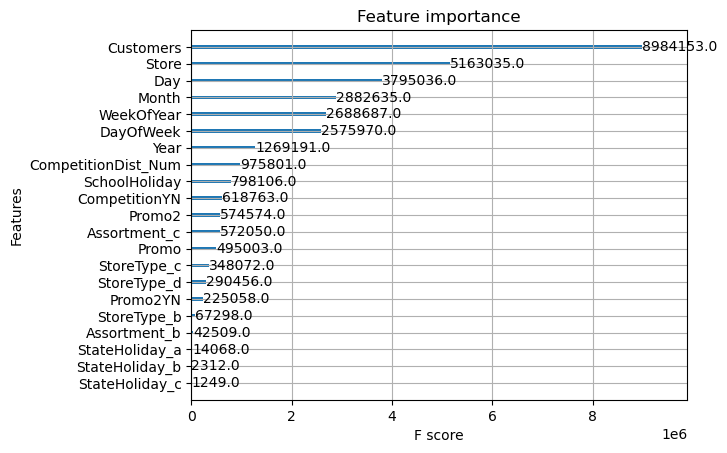

In [ ]:
xgb.plot_importance(gbm)

Try without 'StateHoliday'

In [ ]:
X_train_t2 =X_train_t[['Store','Customers', 'DayOfWeek', 'Promo', 'SchoolHoliday',
       'CompetitionYN', 'Promo2YN', 'StoreType_c',
       'StoreType_d', 'Assortment_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear']]
X_test_t2=X_test_t[['Store','Customers', 'DayOfWeek', 'Promo', 'SchoolHoliday',
       'CompetitionYN', 'Promo2YN', 'StoreType_c',
       'StoreType_d', 'Assortment_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear']]
dtrain = xgb.DMatrix(X_train_t2, y_train_t)
dvalid = xgb.DMatrix(X_test_t2, y_test_t)
train_valid = [(dtrain, 'train'), (dvalid, 'eval')]

print("Train a XGBoost model2 with less features")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=train_valid, early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))

print("validating")
X_test_t2.sort_index(inplace=True) 
y_test_t.sort_index(inplace=True) 

yhat = gbm.predict(xgb.DMatrix(X_test_t2))
error = rmspe(np.expm1(y_test_t), np.expm1(yhat))

print('RMSPE: {:.6f}'.format(error))

Train a XGBoost model2 with less features
[20:05:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.



/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/xgboost/training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[0]	train-rmse:8.02392	train-rmspe:0.99978	eval-rmse:7.96820	eval-rmspe:0.99974
[1]	train-rmse:7.78380	train-rmspe:0.99968	eval-rmse:7.72877	eval-rmspe:0.99964
[2]	train-rmse:7.55089	train-rmspe:0.99956	eval-rmse:7.49504	eval-rmspe:0.99951
[3]	train-rmse:7.32496	train-rmspe:0.99941	eval-rmse:7.26854	eval-rmspe:0.99935
[4]	train-rmse:7.10579	train-rmspe:0.99924	eval-rmse:7.05046	eval-rmspe:0.99917
[5]	train-rmse:6.89319	train-rmspe:0.99902	eval-rmse:6.83876	eval-rmspe:0.99894
[6]	train-rmse:6.68702	train-rmspe:0.99877	eval-rmse:6.63206	eval-rmspe:0.99867
[7]	train-rmse:6.48701	train-rmspe:0.99847	eval-rmse:6.43301	eval-rmspe:0.99835
[8]	train-rmse:6.29296	train-rmspe:0.99811	eval-rmse:6.23970	eval-rmspe:0.99797
[9]	train-rmse:6.10481	train-rmspe:0.99769	eval-rmse:6.05261	eval-rmspe:0.99753
[10]	train-rmse:5.92231	train-rmspe:0.99720	eval-rmse:5.87085	eval-rmspe:0.99701
[11]	train-rmse:5.74532	train-rmspe:0.99664	eval-rmse:5.69451	eval-rmspe:0.99642
[12]	train-rmse:5.57365	train-rmspe:0.

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

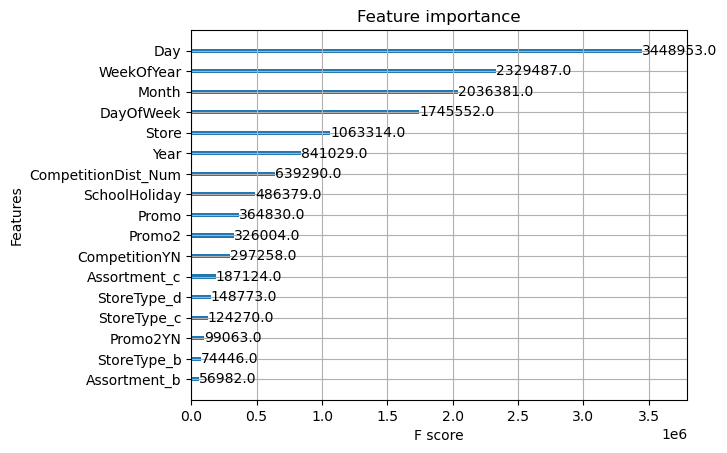

In [ ]:
xgb.plot_importance(gbm)

### Hyperparameter Optimization

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective="reg:linear",
                           booster="gbtree",
                           eta=0.03,
                           max_depth=20,
                           subsample=0.9,
                           colsample_bytree=0.7,
                           silent=1,
                           seed=10)

# Define the hyperparameter grid to search over
param_grid = {
    "max_depth": [3, 5, 10, 15, 20],
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "min_child_weight": [1, 3, 5, 7],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_t, y_train_t)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean squared error: ", grid_search.best_score_)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[20:23:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:23:23] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:23:23] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:23:35] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/obj

KeyboardInterrupt: 

## Multiple models 

In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

models=[('LR',LinearRegression()),('DT',DecisionTreeRegressor()),('RF',RandomForestRegressor()),('XGB',XGBRegressor())
        ,('SVR',SVR()), ('MLP', MLPRegressor(hidden_layer_sizes=10, random_state=42))]
scores=[]

for name,model in models:
    model.fit(X_train_t,y_train_t)
    preds=model.predict(X_test)
    score=explained_variance_score(preds,y_test_t)
    mae = mean_absolute_error(y_test_t, preds)
    r2 = r2_score(y_test_t, preds)
    scores.append([name,model,mae,r2,score])

In [ ]:
scores_df=pd.DataFrame(scores,columns=['Name','Model','MAE','R2','Score'])
scores_df.sort_values('Score',ascending=False)

scores_df.set_index('Name', drop=True,inplace=True)
scores_df

## Linear Regression

In [ ]:
X_train_t3 =X_train_t[['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Promo2',
       'CompetitionYN', 'Promo2YN', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear', 'Customers']]
X_test_t3=X_test_t[['Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'Promo2',
       'CompetitionYN', 'Promo2YN', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'CompetitionDist_Num', 'Year',
       'Month', 'Day', 'WeekOfYear', 'Customers']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
_ = model.fit(X_train_t3, y_train_t)
model.score(X_train_t3, y_train_t)
predictions = model.predict(X_test_t3)
y_pred_lr = pd.DataFrame(predictions, columns = ['Sales'])
y_pred_lr

rmspe(y_test_t,predictions)

0.9999466139924346

## RFE - Feature selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# drop the 1 column in X
RFE_regressor = LinearRegression()
#Initializing RFE model
rfe = RFE(RFE_regressor)# random number(2)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_t,y_train_t)  
#Fitting the data to model
RFE_regressor.fit(X_train_t,y_train_t)
print(rfe.support_)
print(rfe.ranking_)

#-------before calc high score it says all true ----
from sklearn.linear_model import LinearRegression
#no of features
nof_list=np.arange(1,4)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model)
    X_train_rfe = rfe.fit_transform(X_train_t,y_train_t)
    X_test_rfe = rfe.transform(X_test_t)
    model.fit(X_train_rfe,y_train_t)
    score = model.score(X_test_rfe,predictions)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

rmspe_scorer = make_scorer(rmspe)

cv_results_mlp= cross_validate(model_mlp, X_train, y_train['Sales'], scoring = rmspe_scorer, cv=5)
cv_results_mlp

### Below - First attempts with merged_data without using time series model 

In [ ]:
## Divide the columns by type - category & numerical
categorical_columns_subset = [
    'Assortment','StoreType','DayOfWeek', 'Promo', "StateHoliday", 
    "SchoolHoliday", "CompetitionYN", "Promo2YN","CompetitionDist_Cat",'Store',
]

numerical_columns_subset = [
    'CompetitionDistance',
    'Sales',
    'Customers'
]

merged_data3 = merged_data2[categorical_columns_subset + numerical_columns_subset]
merged_data3[categorical_columns_subset] = merged_data2[categorical_columns_subset].astype("category")

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_10766/1910774588.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data3[categorical_columns_subset] = merged_data2[categorical_columns_subset].astype("category")


In [ ]:
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(merged_data3.shape[0]),str(merged_data3.shape[1]))) 

The Train_Store dataset has 879496 Rows and 13 Variables


In [ ]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude="category")
categorical_columns_selector = selector(dtype_include="category")

numerical_columns = numerical_columns_selector(merged_data3)
categorical_columns = categorical_columns_selector(merged_data3)

In [ ]:
merged_data4=merged_data3.copy(deep=True)
merged_data4['StateHoliday'] = merged_data3['StateHoliday'].astype('category')
merged_data4['Assortment'] = merged_data3['Assortment'].astype('category')
merged_data4['StoreType'] = merged_data3['StoreType'].astype('category')

In [ ]:
merged_data4['StateHoliday_cat'] = merged_data3['StateHoliday'].cat.codes
merged_data4['Assortment_cat'] = merged_data3['Assortment'].cat.codes
merged_data4['StoreType_cat'] = merged_data3['StoreType'].cat.codes

In [ ]:
merged_data4['StateHoliday_cat'] = merged_data4['StateHoliday_cat'].astype('float')
merged_data4['Assortment_cat'] = merged_data4['Assortment_cat'].astype('float')
merged_data4['StoreType_cat'] = merged_data4['StoreType_cat'].astype('float')

In [ ]:
merged_data4['SalesperCustomer'] = merged_data4['Sales'] / merged_data4['Customers']

In [ ]:
df_correlation=merged_data4[[
        'Store', 'DayOfWeek', 'Sales', 
        'Customers', 'Promo',
        'SchoolHoliday',
        'CompetitionDistance', 'Promo2YN','CompetitionYN', 
        'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat','SalesperCustomer']]

In [ ]:
df_correlation.corr(numeric_only=False)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2YN,CompetitionYN,StateHoliday_cat,Assortment_cat,StoreType_cat,SalesperCustomer
Store,1.000000,0.000393,0.007710,0.033977,-0.000063,-0.000439,-0.031677,-0.013453,0.011954,0.001895,0.005221,-0.022600,-0.048423
DayOfWeek,0.000393,1.000000,-0.178736,-0.097266,-0.290138,-0.143865,-0.004375,0.000720,0.001037,-0.001686,0.001360,-0.002125,-0.094924
Sales,0.007710,-0.178736,1.000000,0.823597,0.368145,0.038617,-0.049206,0.021897,-0.030162,0.020107,0.109030,-0.016161,0.186581
Customers,0.033977,-0.097266,0.823597,1.000000,0.182846,0.024902,-0.197402,0.034522,-0.016831,0.049521,0.007272,-0.194623,-0.323898
Promo,-0.000063,-0.290138,0.368145,0.182846,1.000000,0.035300,0.001962,0.000138,-0.004705,-0.002958,-0.000363,0.000460,0.280009
SchoolHoliday,-0.000439,-0.143865,0.038617,0.024902,0.035300,1.000000,0.002057,0.012941,0.005692,0.020569,-0.001221,0.004220,0.013192
CompetitionDistance,-0.031677,-0.004375,-0.049206,-0.197402,0.001962,0.002057,1.000000,0.025315,0.010462,-0.010113,0.154492,0.230264,0.314988
Promo2YN,-0.013453,0.000720,0.021897,0.034522,0.000138,0.012941,0.025315,1.000000,0.095711,0.002949,0.056613,0.035469,-0.017734
CompetitionYN,0.011954,0.001037,-0.030162,-0.016831,-0.004705,0.005692,0.010462,0.095711,1.000000,0.001300,0.032592,-0.008110,-0.004422
StateHoliday_cat,0.001895,-0.001686,0.020107,0.049521,-0.002958,0.020569,-0.010113,0.002949,0.001300,1.000000,-0.000773,-0.004213,-0.033580


In [ ]:
merged_data4

,Assortment,StoreType,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionYN,Promo2YN,CompetitionDist_Cat,Store,CompetitionDistance,Sales,Customers,StateHoliday_cat,Assortment_cat,StoreType_cat,SalesperCustomer
0,a,c,5,1,0,1,1,1,"(-9.99, 1998.0]",1,1270.0,5263.0,555.0,0.0,0.0,2.0,9.482883
1,a,a,5,1,0,1,1,1,"(-9.99, 1998.0]",2,570.0,6064.0,625.0,0.0,0.0,0.0,9.702400
2,a,a,5,1,0,1,1,1,"(-9.99, 1998.0]",3,1910.0,8314.0,821.0,0.0,0.0,0.0,10.126675
3,c,c,5,1,0,1,1,1,"(-9.99, 1998.0]",4,620.0,13995.0,1498.0,0.0,2.0,2.0,9.342457
4,a,a,5,1,0,1,1,1,"(-9.99, 1998.0]",5,1910.0,4822.0,559.0,0.0,0.0,0.0,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879491,a,a,6,0,0,0,1,1,"(-9.99, 1998.0]",1111,1900.0,NaN,NaN,0.0,0.0,0.0,NaN
879492,c,c,6,0,0,0,1,1,"(-9.99, 1998.0]",1112,1880.0,NaN,NaN,0.0,2.0,2.0,NaN
879493,c,a,6,0,0,0,1,1,"(7992.0, 9990.0]",1113,9260.0,NaN,NaN,0.0,2.0,0.0,NaN
879494,c,a,6,0,0,0,1,1,"(-9.99, 1998.0]",1114,870.0,NaN,NaN,0.0,2.0,0.0,NaN


In [ ]:
#Train and Test data set split
traindata=merged_data3[merged_data3['Sales'].notna()]
testdata=merged_data3[merged_data3['Sales'].isna()]


y_train=traindata.iloc[:,10:]
X_train=traindata.drop(['Sales','Customers'], axis=1)

y_test=testdata.iloc[:,10:]
X_test=testdata.drop(['Sales','Customers'], axis=1)

In [ ]:
#for rmspe calculation - split train data to two datasets
from sklearn.model_selection import train_test_split

X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train

,Store,Assortment,StoreType,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionYN,Promo2YN,CompetitionDistance
0,1,a,c,5,1,0,1,1,1,1270.0
1,1,a,c,4,1,0,1,1,1,1270.0
2,1,a,c,3,1,0,1,1,1,1270.0
3,1,a,c,2,1,0,1,1,1,1270.0
4,1,a,c,1,1,0,1,1,1,1270.0
...,...,...,...,...,...,...,...,...,...,...
879450,1115,c,d,1,1,0,1,1,1,5350.0
879451,1115,c,d,6,0,0,1,1,1,5350.0
879452,1115,c,d,5,0,0,1,1,1,5350.0
879453,1115,c,d,4,0,0,1,1,1,5350.0


In [ ]:
X_test

,Store,Assortment,StoreType,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionYN,Promo2YN,CompetitionDistance
781,1,a,c,4,1,0,0,1,1,1270.0
782,1,a,c,3,1,0,0,1,1,1270.0
783,1,a,c,2,1,0,0,1,1,1270.0
784,1,a,c,1,1,0,0,1,1,1270.0
785,1,a,c,6,0,0,0,1,1,1270.0
...,...,...,...,...,...,...,...,...,...,...
879491,1115,c,d,4,1,0,1,1,1,5350.0
879492,1115,c,d,3,1,0,1,1,1,5350.0
879493,1115,c,d,2,1,0,1,1,1,5350.0
879494,1115,c,d,1,1,0,1,1,1,5350.0


In [ ]:
#Scaling for categorical and numerical
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor,[numerical_columns[0]])],remainder='passthrough')

In [ ]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Store', 'Assortment',
                                                   'StoreType', 'DayOfWeek',
                                                   'Promo', 'StateHoliday',
                                                   'SchoolHoliday',
                                                   'CompetitionYN',
                                                   'Promo2YN']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['CompetitionDistance'])])),
                ('linearregression', LinearRegression())])

In [ ]:
_ = model.fit(X_train, y_train)
model.score(X_train, y_train)


0.8191431015025938

In [ ]:
predictions = model.predict(X_test)
predictions

array([[5554.84123677,  618.44929782],
       [5551.2499974 ,  607.12166985],
       [5911.17661605,  636.59996678],
       ...,
       [7657.20188214,  514.22817888],
       [8728.01696549,  595.55215402],
       [5426.03020952,  342.61617915]])

In [ ]:
y_test_pred = pd.DataFrame(predictions, columns = ['Sales','Customers'])
y_test_pred

,Sales,Customers
0,5554.841237,618.449298
1,5551.249997,607.121670
2,5911.176616,636.599967
3,6981.991699,717.923942
4,3680.004943,464.987967
...,...,...
35099,7300.866503,496.077510
35100,7297.275263,484.749882
35101,7657.201882,514.228179
35102,8728.016965,595.552154


In [ ]:
np.mean(y_test)

/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Sales        6948.046448
Customers     740.607324
dtype: float64

In [ ]:
np.mean(y_train)

Sales        6955.514291
Customers     762.728395
dtype: float64

In [ ]:
def rmspe(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    rmspe_result = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))

    return rmspe_result

## RFE

In [ ]:
X_train_dummy = pd.get_dummies(data=X_train.iloc[:,1:2], drop_first=True)
X_test_dummy = pd.get_dummies(data=X_test.iloc[:,1:2], drop_first=True)

X_train = pd.merge(X_train, X_train_dummy, on="Store")
X_test = pd.merge(X_test, X_test_dummy, on="Store")

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# drop the 1 column in X
RFE_regressor = LinearRegression()
#Initializing RFE model
rfe = RFE(RFE_regressor)# random number(2)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
RFE_regressor.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# drop the 1 column in X
RFE_regressor = LinearRegression()
#Initializing RFE model
rfe = RFE(RFE_regressor)# random number(2)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
RFE_regressor.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

#-------before calc high score it says all true ----
from sklearn.linear_model import LinearRegression
#no of features
nof_list=np.arange(1,4)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,predictions)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Assortment
- Date
- StateHoliday
- StoreType
Feature names seen at fit time, yet now missing:
- Assortment_b
- Assortment_c
- StateHoliday_a
- StateHoliday_b
- StateHoliday_c
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 11 features, but RFE is expecting 15 features as input.